In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates

from datetime import datetime, timedelta
pd.set_option('display.max_columns', 5000)

import warnings
warnings.filterwarnings('ignore')

In [106]:
sns.set_style("whitegrid")

_________

# Data Loading & Cleaning, with Preliminary Analysis

In [2]:
calories_burned_df = pd.read_csv('./calories_burned.csv')
day_summary_df = pd.read_csv('./day_summary.csv')
exercise_df = pd.read_csv('./Exercise.csv')
floors_climbed_df = pd.read_csv('./floors_climbed.csv')

sleep_df = pd.read_csv('./sleep.csv')
sleep_df2 = pd.read_csv('./sleep_data.csv')
step_count_df = pd.read_csv('./step_count.csv')
step_daily_df = pd.read_csv('./step_daily_trend.csv')
stress_df = pd.read_csv('./stress.csv')

_______

## Calories_burned

In [3]:
calories_burned_df = pd.read_csv('./calories_burned.csv')

In [4]:
calories_burned_df.head()

Unnamed: 0  tef_calorie  active_time                     pkg_name  \
0           0          0.0      5430506  com.sec.android.app.shealth   
1           1          0.0      2053212  com.sec.android.app.shealth   
2           2          0.0      3483154  com.sec.android.app.shealth   
3           3          0.0      3630996  com.sec.android.app.shealth   
4           4          0.0      2346862  com.sec.android.app.shealth   

               update_time              create_time  \
0  2019-05-11 10:50:34.030  2019-05-10 11:48:05.846   
1  2019-05-10 11:51:25.229  2019-05-10 11:48:17.809   
2  2019-05-10 11:51:25.404  2019-05-10 11:48:17.871   
3  2019-05-10 11:51:25.809  2019-05-10 11:48:18.031   
4  2019-05-10 11:51:26.039  2019-05-10 11:48:18.107   

                               datauuid  rest_calorie  active_calorie  \
0  edbeb878-ad75-4bf2-995f-cff7c19f89d4     1699.8844       473.56952   
1  d75e0fc1-f033-4484-92b2-7f5851f6e0ae     1770.7876       134.47000   
2  dd95e9bb-d2d9-4d8d-bc3d-c295bc1488cf     1740.7673       223.66000   
3  1858ba1b-97ce-4331-8e23-25086963ac2a     1737.6636       230.03998   
4  3b31eb50-4fad-438e-b5bd-b9a6a7c46a8e     1764.6228       232.24223   

        day_time  deviceuuid  
0  1557446400000  FN3Qt5ROM0  
1  1555545600000  FN3Qt5ROM0  
2  1555632000000  FN3Qt5ROM0  
3  1555804800000  FN3Qt5ROM0  
4  1555891200000  FN3Qt5ROM0

In [5]:
calories_burned_df.nunique()

Unnamed: 0        560
tef_calorie         1
active_time       550
pkg_name            1
update_time       560
create_time       560
datauuid          560
rest_calorie      551
active_calorie    550
day_time          560
deviceuuid          2
dtype: int64

In [6]:
calories_burned_df.drop(['Unnamed: 0', 'tef_calorie', 'pkg_name', 'datauuid'], axis=1, inplace=True)

In [7]:
calories_burned_df['day_time'] = pd.to_datetime(calories_burned_df['day_time'], unit='ms')

In [8]:
# Active_time to minutes
calories_burned_df['active_time'] = calories_burned_df['active_time']/60000

In [9]:
calories_burned_df[calories_burned_df['deviceuuid'] == 'FN3Qt5ROM0']

active_time              update_time              create_time  \
0      90.508433  2019-05-11 10:50:34.030  2019-05-10 11:48:05.846   
1      34.220200  2019-05-10 11:51:25.229  2019-05-10 11:48:17.809   
2      58.052567  2019-05-10 11:51:25.404  2019-05-10 11:48:17.871   
3      60.516600  2019-05-10 11:51:25.809  2019-05-10 11:48:18.031   
4      39.114367  2019-05-10 11:51:26.039  2019-05-10 11:48:18.107   
5     100.534400  2019-05-10 11:51:26.283  2019-05-10 11:48:18.167   
6     115.977483  2019-05-10 11:51:26.453  2019-05-10 11:48:18.245   
7     188.148083  2019-05-10 11:51:27.090  2019-05-10 11:48:18.403   
8     134.025583  2019-05-10 11:51:27.365  2019-05-10 11:48:18.512   
9      86.499150  2019-05-10 11:51:27.411  2019-05-10 11:48:18.581   
10     37.573333  2019-05-10 11:51:27.705  2019-05-10 11:48:18.746   
11     77.686117  2019-05-10 11:51:28.022  2019-05-10 11:48:18.905   
12    107.338017  2019-05-10 11:51:28.081  2019-05-10 11:48:18.948   
13     22.785017  2019-05-10 13:34:38.725  2019-05-10 11:48:18.987   
515   168.558400  2019-05-10 11:51:24.700  2019-04-15 10:42:19.213   
516    99.692133  2019-05-10 11:51:27.652  2019-05-02 04:00:00.668   
517    63.771200  2019-05-10 11:51:27.942  2019-05-06 04:33:49.372   
523   137.479583  2019-05-10 11:51:24.356  2019-04-13 04:00:28.729   
526   112.373067  2019-05-10 11:51:27.592  2019-05-01 04:00:57.494   
527   131.301367  2019-05-10 11:51:26.814  2019-04-25 07:00:02.662   
535   128.636083  2019-05-10 11:51:27.863  2019-05-05 04:00:02.324   
536    99.000150  2019-05-10 11:51:25.619  2019-04-20 08:21:30.245   
539   135.404967  2019-05-10 11:51:26.926  2019-04-26 07:00:01.940   
541   134.216333  2019-05-10 11:51:24.571  2019-04-14 04:00:03.438   
542   171.189617  2019-05-10 11:51:24.841  2019-04-16 07:00:00.874   
545   150.778300  2019-05-10 11:51:25.030  2019-04-17 07:01:00.996   
553   111.215917  2019-05-10 11:51:27.196  2019-04-28 07:00:23.423   
555   114.372100  2019-05-10 11:51:27.801  2019-05-04 04:00:01.642   
558    58.597617  2019-05-12 14:27:08.064  2019-05-11 04:37:31.958   
559    49.749317  2019-05-12 14:30:47.436  2019-05-12 05:25:33.092   

     rest_calorie  active_calorie   day_time  deviceuuid  
0       1699.8844       473.56952 2019-05-10  FN3Qt5ROM0  
1       1770.7876       134.47000 2019-04-18  FN3Qt5ROM0  
2       1740.7673       223.66000 2019-04-19  FN3Qt5ROM0  
3       1737.6636       230.03998 2019-04-21  FN3Qt5ROM0  
4       1764.6228       232.24223 2019-04-22  FN3Qt5ROM0  
5       1687.2551       288.66046 2019-04-23  FN3Qt5ROM0  
6       1667.8024       779.65393 2019-04-24  FN3Qt5ROM0  
7       1576.8927      1038.01510 2019-04-27  FN3Qt5ROM0  
8       1645.0681       577.73413 2019-04-29  FN3Qt5ROM0  
9       1704.9346       421.17560 2019-04-30  FN3Qt5ROM0  
10      1766.5640       147.01001 2019-05-03  FN3Qt5ROM0  
11      1716.0360       383.16010 2019-05-07  FN3Qt5ROM0  
12      1678.6850       428.57935 2019-05-08  FN3Qt5ROM0  
13      1785.1920        78.95999 2019-05-09  FN3Qt5ROM0  
515     1601.5688      1626.43680 2019-04-15  FN3Qt5ROM0  
516     1688.3162       601.91895 2019-05-02  FN3Qt5ROM0  
517     1733.5638       313.03003 2019-05-06  FN3Qt5ROM0  
523     1640.7173       712.18994 2019-04-13  FN3Qt5ROM0  
526     1672.3427       522.93097 2019-05-01  FN3Qt5ROM0  
527     1648.4996       552.69580 2019-04-25  FN3Qt5ROM0  
535     1651.8569       580.08340 2019-05-05  FN3Qt5ROM0  
536     1689.1879       423.87030 2019-04-20  FN3Qt5ROM0  
539     1643.3306       566.72290 2019-04-26  FN3Qt5ROM0  
541     1644.8279       538.13104 2019-04-14  FN3Qt5ROM0  
542     1598.2545       656.17470 2019-04-16  FN3Qt5ROM0  
545     1623.9656      1020.66260 2019-04-17  FN3Qt5ROM0  
553     1673.8003       457.58000 2019-04-28  FN3Qt5ROM0  
555     1669.8245       453.39920 2019-05-04  FN3Qt5ROM0  
558     1740.0808       223.91000 2019-05-11  FN3Qt5ROM0  
559      731.9074       371.75000 2019-05-12  FN3Qt5ROM0

In [10]:
calories_burned_df.sort_values(by='day_time')

active_time              update_time              create_time  \
182    81.170500  2017-11-26 16:33:20.919  2017-11-26 16:33:20.919   
142     0.311267  2017-11-26 16:33:21.031  2017-11-26 16:33:21.031   
81     58.705100  2017-11-26 16:33:21.164  2017-11-26 16:33:21.164   
29     32.452250  2017-11-26 16:33:21.218  2017-11-26 16:33:21.218   
338     9.351317  2017-11-26 16:33:21.342  2017-11-26 16:33:21.342   
432    31.918567  2017-11-26 16:33:21.441  2017-11-26 16:33:21.441   
510     0.133400  2017-11-26 16:33:21.623  2017-11-26 16:33:21.623   
503    87.257033  2017-11-26 16:33:21.732  2017-11-26 16:33:21.732   
405    17.585983  2017-11-26 16:33:21.839  2017-11-26 16:33:21.839   
283    72.274950  2017-11-26 16:33:21.940  2017-11-26 16:33:21.940   
132    22.267117  2017-11-26 16:33:22.048  2017-11-26 16:33:22.048   
450    15.190933  2017-11-26 16:33:22.125  2017-11-26 16:33:22.125   
378    32.228617  2017-11-26 16:33:22.190  2017-11-26 16:33:22.190   
339     0.000000  2017-11-26 16:33:22.247  2017-11-26 16:33:22.247   
492    75.131733  2017-11-26 16:33:22.302  2017-11-26 16:33:22.302   
340     6.488883  2017-11-26 16:33:22.370  2017-11-26 16:33:22.370   
307    94.725083  2017-11-26 16:33:22.467  2017-11-26 16:33:22.467   
56     13.003500  2017-11-26 16:33:22.560  2017-11-26 16:33:22.560   
448     2.112167  2017-11-26 16:33:22.644  2017-11-26 16:33:22.644   
380    82.691150  2017-11-26 16:33:22.727  2017-11-26 16:33:22.727   
375    53.474267  2017-11-26 16:33:22.876  2017-11-26 16:33:22.876   
478    83.839850  2017-11-26 16:33:22.976  2017-11-26 16:33:22.976   
509     9.341833  2017-11-26 16:33:23.070  2017-11-26 16:33:23.070   
62     82.656200  2017-11-26 16:33:23.130  2017-11-26 16:33:23.130   
256    20.885767  2017-11-26 16:33:23.213  2017-11-26 16:33:23.213   
491    76.022250  2017-11-26 02:09:08.540  2017-11-26 02:09:08.540   
431    17.244850  2017-11-26 06:07:58.877  2017-11-26 02:09:07.320   
436    17.929667  2017-11-27 07:31:21.334  2017-11-26 06:07:58.623   
400    65.678683  2017-11-28 06:32:05.518  2017-11-27 07:31:20.796   
162    52.937083  2017-11-29 05:00:01.654  2017-11-28 06:32:04.663   
..           ...                      ...                      ...   
523   137.479583  2019-05-10 11:51:24.356  2019-04-13 04:00:28.729   
541   134.216333  2019-05-10 11:51:24.571  2019-04-14 04:00:03.438   
515   168.558400  2019-05-10 11:51:24.700  2019-04-15 10:42:19.213   
542   171.189617  2019-05-10 11:51:24.841  2019-04-16 07:00:00.874   
545   150.778300  2019-05-10 11:51:25.030  2019-04-17 07:01:00.996   
1      34.220200  2019-05-10 11:51:25.229  2019-05-10 11:48:17.809   
2      58.052567  2019-05-10 11:51:25.404  2019-05-10 11:48:17.871   
536    99.000150  2019-05-10 11:51:25.619  2019-04-20 08:21:30.245   
3      60.516600  2019-05-10 11:51:25.809  2019-05-10 11:48:18.031   
4      39.114367  2019-05-10 11:51:26.039  2019-05-10 11:48:18.107   
5     100.534400  2019-05-10 11:51:26.283  2019-05-10 11:48:18.167   
6     115.977483  2019-05-10 11:51:26.453  2019-05-10 11:48:18.245   
527   131.301367  2019-05-10 11:51:26.814  2019-04-25 07:00:02.662   
539   135.404967  2019-05-10 11:51:26.926  2019-04-26 07:00:01.940   
7     188.148083  2019-05-10 11:51:27.090  2019-05-10 11:48:18.403   
553   111.215917  2019-05-10 11:51:27.196  2019-04-28 07:00:23.423   
8     134.025583  2019-05-10 11:51:27.365  2019-05-10 11:48:18.512   
9      86.499150  2019-05-10 11:51:27.411  2019-05-10 11:48:18.581   
526   112.373067  2019-05-10 11:51:27.592  2019-05-01 04:00:57.494   
516    99.692133  2019-05-10 11:51:27.652  2019-05-02 04:00:00.668   
10     37.573333  2019-05-10 11:51:27.705  2019-05-10 11:48:18.746   
555   114.372100  2019-05-10 11:51:27.801  2019-05-04 04:00:01.642   
535   128.636083  2019-05-10 11:51:27.863  2019-05-05 04:00:02.324   
517    63.771200  2019-05-10 11:51:27.942  2019-05-06 04:33:49.372   
11     77.686117  2019-05-10 11:51:28.022  2019-05-10 11:48:18.905   
12    107.33801

#### Active calories burned by Date

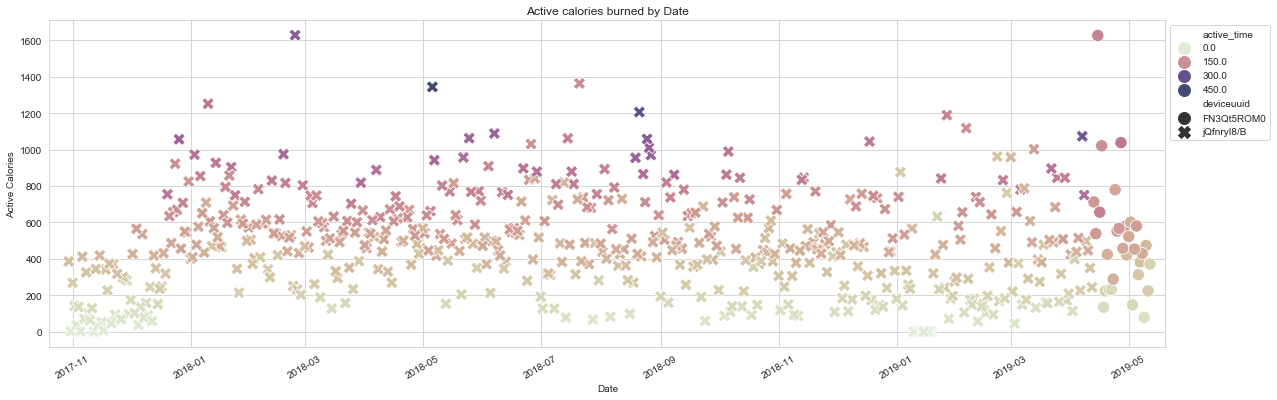

In [107]:
fig = plt.figure(figsize=(20, 6))
palette = sns.cubehelix_palette(4, start=2, rot=1, dark=.3, light=.9, as_cmap=True)
ax = sns.scatterplot(data=calories_burned_df, x='day_time',y='active_calorie', hue='active_time', 
                     palette=palette, style='deviceuuid', s=150)
ax = ax.set(xlabel='Date', ylabel='Active Calories', xlim=('2017-10-20', '2019-05-20'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Active calories burned by Date')
plt.show(ax)

#### Rest calories burned by Date

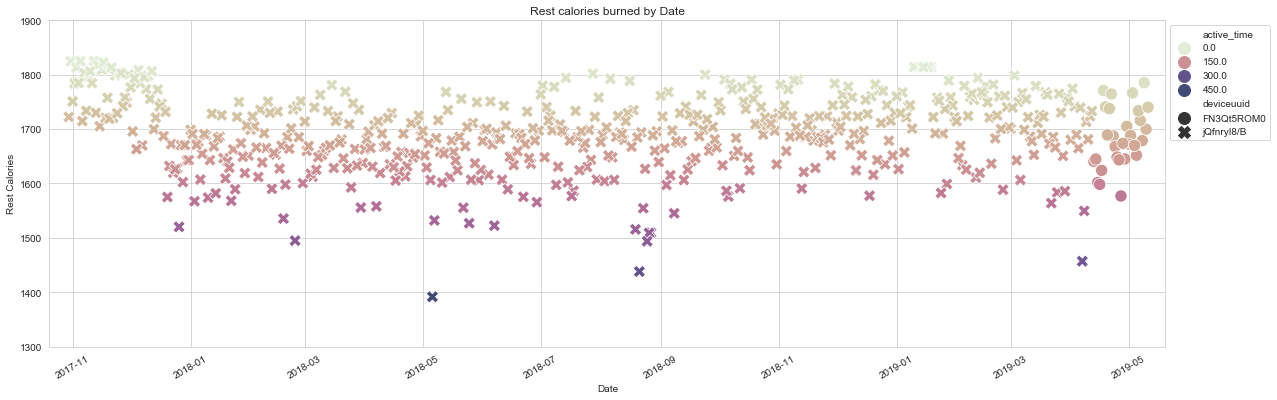

In [108]:
fig = plt.figure(figsize=(20, 6))
palette = sns.cubehelix_palette(4, start=2, rot=1, dark=.3, light=.9, as_cmap=True)
ax = sns.scatterplot(data=calories_burned_df, x='day_time',y='rest_calorie', hue='active_time', 
                     palette=palette, style='deviceuuid', s=150)
ax = ax.set(xlabel='Date', ylabel='Rest Calories', xlim=('2017-10-20', '2019-05-20'), ylim=(1300, 1900))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Rest calories burned by Date')
plt.show(ax)

____

## Day_summary

In [13]:
day_summary_df.head()

Unnamed: 0  others_time  goal  longest_idle_time              create_time  \
0           0            0    60           24780000  2019-05-10 11:48:05.697   
1           1       600000    60           26160000  2019-05-10 11:48:07.739   
2           2            0    60           26160000  2019-05-10 11:48:07.810   
3           3            0    60           23940000  2019-05-10 11:48:07.887   
4           4            0    60           31080000  2019-05-10 11:48:07.975   

    distance  run_time  step_count  walk_time       day_time  deviceuuid  \
0  7351.8780     10190       11268    5420316  1557446400000  FN3Qt5ROM0   
1  4194.5103     30172        5187    3196100  1557100800000  FN3Qt5ROM0   
2  5898.7295     64924        7654    4596243  1557187200000  FN3Qt5ROM0   
3  8043.2020     19669       10561    6420612  1557273600000  FN3Qt5ROM0   
4  1653.8097      3831        2132    1363270  1557360000000  FN3Qt5ROM0   

   active_time  score                     pkg_name              update_time  \
0      5430506    150  com.sec.android.app.shealth  2019-05-11 10:50:32.419   
1      3826272    105  com.sec.android.app.shealth  2019-05-10 11:51:21.510   
2      4661167    128  com.sec.android.app.shealth  2019-05-10 11:51:22.534   
3      6440281    178  com.sec.android.app.shealth  2019-05-10 11:51:23.320   
4      1367101     36  com.sec.android.app.shealth  2019-05-10 13:34:33.493   

   longest_active_time                              datauuid  \
0              1075053  81a48e9f-a182-4750-967c-2f80c157b9b9   
1               681165  30c74ded-4f35-4517-b2e8-59a070ca0cc2   
2               540000  34553e4b-df9f-4233-9eb7-cab1b4644e69   
3               993852  b5733979-0e07-479c-be92-2b3b29cda0e7   
4               688260  624a3ac6-6e77-42f5-9875-8e02b8d5ade4   

                                          extra_data    calorie  
0  81a48e9f-a182-4750-967c-2f80c157b9b9.extra_dat...  473.56958  
1  30c74ded-4f35-4517-b2e8-59a070ca0cc2.extra_dat...  313.03003  
2  34553e4b-df9f-4233-9eb7-cab1b4644e69.extra_dat...  383.16010  
3  b5733979-0e07-479c-be92-2b3b29cda0e7.extra_dat...  428.57930  
4  624a3ac6-6e77-42f5-9875-8e02b8d5ade4.extra_dat...   78.95998

In [14]:
day_summary_df.nunique()

Unnamed: 0             1079
others_time             161
goal                      2
longest_idle_time       452
create_time            1079
distance               1068
run_time                885
step_count             1022
walk_time              1066
day_time               1079
deviceuuid                2
active_time            1066
score                   134
pkg_name                  1
update_time            1079
longest_active_time     376
datauuid               1079
extra_data             1079
calorie                1067
dtype: int64

In [15]:
day_summary_df.drop(['Unnamed: 0', 'pkg_name', 'datauuid', 'extra_data'], axis=1, inplace=True)

In [16]:
day_summary_df

others_time  goal  longest_idle_time              create_time  \
0               0    60           24780000  2019-05-10 11:48:05.697   
1          600000    60           26160000  2019-05-10 11:48:07.739   
2               0    60           26160000  2019-05-10 11:48:07.810   
3               0    60           23940000  2019-05-10 11:48:07.887   
4               0    60           31080000  2019-05-10 11:48:07.975   
5               0    -1           31620000  2017-01-04 08:00:00.996   
6               0    -1           33300000  2016-12-30 08:00:03.019   
7               0    60           26820000  2016-10-12 07:00:01.769   
8               0    -1           30600000  2016-10-25 07:00:01.479   
9               0    -1           23280000  2017-06-13 04:15:01.321   
10              0    -1           47340000  2016-11-17 08:00:01.203   
11              0    -1           36420000  2017-10-17 04:14:59.376   
12              0    -1           22140000  2017-05-10 04:00:01.963   
13              0    -1           39899999  2017-11-25 05:00:01.615   
14              0    60           32460000  2016-08-21 07:00:07.519   
15              0    -1           58080000  2017-06-06 04:00:00.775   
16              0    60           29400000  2016-10-04 07:00:00.871   
17              0    60           41460000  2016-10-15 07:00:01.495   
18              0    -1           29400000  2017-08-31 04:00:00.416   
19              0    -1           14820000  2017-06-02 04:01:02.215   
20        4054306    -1           17700000  2018-01-05 05:00:01.316   
21              0    -1           29820000  2016-12-01 05:00:01.815   
22              0    60           28500000  2016-09-08 07:13:57.053   
23              0    -1           31380000  2017-08-20 04:00:08.232   
24              0    60           36780000  2016-09-11 07:15:00.223   
25              0    -1           23340000  2016-06-25 14:40:08.941   
26              0    -1           36000000  2016-11-22 08:00:01.780   
27              0    -1           49980000  2017-07-17 04:00:00.422   
28              0    -1           23760000  2017-04-06 04:00:01.613   
29              0    -1           39960000  2017-05-19 04:00:06.246   
...           ...   ...                ...                      ...   
1049      3466887    60           23940000  2019-02-25 05:00:31.675   
1050            0    60           21540000  2019-04-10 04:00:00.910   
1051            0    60           26820000  2019-03-20 04:00:21.184   
1052            0    60           25140000  2019-04-04 04:00:00.732   
1053      2400000    60           20940000  2019-04-09 04:00:02.291   
1054            0    60           22380000  2019-05-04 04:00:01.581   
1055            0    60           28620000  2019-04-07 04:00:02.215   
1056            0    60           22560000  2019-04-26 07:00:01.769   
1057            0    60           11640000  2019-05-01 04:00:57.449   
1058      2400000    60           22200000  2019-03-08 05:00:00.591   
1059            0    60           13620000  2019-03-02 05:00:18.504   
1060            0    60           21660000  2019-04-23 08:07:35.890   
1061            0    60           27120000  2019-05-03 04:01:30.475   
1062            0    60           17520000  2019-03-17 04:00:01.727   
1063      2400000    60           24720000  2019-05-02 04:00:00.571   
1064            0    60           22260000  2019-04-05 04:01:14.757   
1065            0    60           23460000  2019-04-06 04:01:15.054   
1066      2710747    60           16800000  2019-03-27 04:00:01.531   
1067            0    60           19500000  2019-03-09 08:04:46.416   
1068            0    60            9780000  2019-04-22 08:42:25.416   
1069      2400000    60           26340000  2019-04-13 04:00:28.542   
1070            0    60           11220000  2019-04-24 07:22:07.051   
1071            0    60           13260000  2019-04-28 07:00:23.272   
1072      5288911    60           24420000  2019-03-13 04:01:58.651   
1073            0    60       

In [17]:
day_summary_df['day_time'] = pd.to_datetime(day_summary_df['day_time'], unit='ms')

In [18]:
# Converting all durations to minutes

day_summary_df['others_time'] = day_summary_df['others_time']/60000
day_summary_df['longest_idle_time'] = day_summary_df['longest_idle_time']/60000
day_summary_df['run_time'] = day_summary_df['run_time']/60000
day_summary_df['walk_time'] = day_summary_df['walk_time']/60000
day_summary_df['active_time'] = day_summary_df['active_time']/60000
day_summary_df['longest_active_time'] = day_summary_df['longest_active_time']/60000

In [19]:
calories_burned_df.head()

active_time              update_time              create_time  \
0    90.508433  2019-05-11 10:50:34.030  2019-05-10 11:48:05.846   
1    34.220200  2019-05-10 11:51:25.229  2019-05-10 11:48:17.809   
2    58.052567  2019-05-10 11:51:25.404  2019-05-10 11:48:17.871   
3    60.516600  2019-05-10 11:51:25.809  2019-05-10 11:48:18.031   
4    39.114367  2019-05-10 11:51:26.039  2019-05-10 11:48:18.107   

   rest_calorie  active_calorie   day_time  deviceuuid  
0     1699.8844       473.56952 2019-05-10  FN3Qt5ROM0  
1     1770.7876       134.47000 2019-04-18  FN3Qt5ROM0  
2     1740.7673       223.66000 2019-04-19  FN3Qt5ROM0  
3     1737.6636       230.03998 2019-04-21  FN3Qt5ROM0  
4     1764.6228       232.24223 2019-04-22  FN3Qt5ROM0

In [20]:
day_summary_df.head()

others_time  goal  longest_idle_time              create_time   distance  \
0          0.0    60              413.0  2019-05-10 11:48:05.697  7351.8780   
1         10.0    60              436.0  2019-05-10 11:48:07.739  4194.5103   
2          0.0    60              436.0  2019-05-10 11:48:07.810  5898.7295   
3          0.0    60              399.0  2019-05-10 11:48:07.887  8043.2020   
4          0.0    60              518.0  2019-05-10 11:48:07.975  1653.8097   

   run_time  step_count   walk_time   day_time  deviceuuid  active_time  \
0  0.169833       11268   90.338600 2019-05-10  FN3Qt5ROM0    90.508433   
1  0.502867        5187   53.268333 2019-05-06  FN3Qt5ROM0    63.771200   
2  1.082067        7654   76.604050 2019-05-07  FN3Qt5ROM0    77.686117   
3  0.327817       10561  107.010200 2019-05-08  FN3Qt5ROM0   107.338017   
4  0.063850        2132   22.721167 2019-05-09  FN3Qt5ROM0    22.785017   

   score              update_time  longest_active_time    calorie  
0    150  2019-05-11 10:50:32.419             17.91755  473.56958  
1    105  2019-05-10 11:51:21.510             11.35275  313.03003  
2    128  2019-05-10 11:51:22.534              9.00000  383.16010  
3    178  2019-05-10 11:51:23.320             16.56420  428.57930  
4     36  2019-05-10 13:34:33.493             11.47100   78.95998

In [21]:
day_summary_df['deviceuuid'].unique()

array(['FN3Qt5ROM0', 'jQfnryI8/B'], dtype=object)

In [22]:
day_summary_df['goal'].unique()

array([60, -1], dtype=int64)

In [23]:
day_summary_df[day_summary_df['goal'] == -1]

others_time  goal  longest_idle_time              create_time  \
5        0.000000    -1         527.000000  2017-01-04 08:00:00.996   
6        0.000000    -1         555.000000  2016-12-30 08:00:03.019   
8        0.000000    -1         510.000000  2016-10-25 07:00:01.479   
9        0.000000    -1         388.000000  2017-06-13 04:15:01.321   
10       0.000000    -1         789.000000  2016-11-17 08:00:01.203   
11       0.000000    -1         607.000000  2017-10-17 04:14:59.376   
12       0.000000    -1         369.000000  2017-05-10 04:00:01.963   
13       0.000000    -1         664.999983  2017-11-25 05:00:01.615   
15       0.000000    -1         968.000000  2017-06-06 04:00:00.775   
18       0.000000    -1         490.000000  2017-08-31 04:00:00.416   
19       0.000000    -1         247.000000  2017-06-02 04:01:02.215   
20      67.571767    -1         295.000000  2018-01-05 05:00:01.316   
21       0.000000    -1         497.000000  2016-12-01 05:00:01.815   
23       0.000000    -1         523.000000  2017-08-20 04:00:08.232   
25       0.000000    -1         389.000000  2016-06-25 14:40:08.941   
26       0.000000    -1         600.000000  2016-11-22 08:00:01.780   
27       0.000000    -1         833.000000  2017-07-17 04:00:00.422   
28       0.000000    -1         396.000000  2017-04-06 04:00:01.613   
29       0.000000    -1         666.000000  2017-05-19 04:00:06.246   
30       0.000000    -1         350.000000  2017-12-23 08:00:01.554   
31       0.000000    -1         433.000000  2017-08-09 04:00:02.574   
32       0.000000    -1         363.000000  2016-06-25 14:40:11.581   
33       0.000000    -1         458.000000  2016-08-26 07:00:01.598   
34       0.000000    -1         376.000000  2017-09-01 04:00:00.519   
35       0.000000    -1         461.000000  2017-03-11 05:15:01.122   
36       0.000000    -1         626.000000  2016-07-02 07:00:00.690   
38       0.000000    -1         474.000000  2017-04-08 04:00:01.631   
39       0.000000    -1         466.000000  2017-12-01 05:58:03.273   
40      69.063500    -1         323.000000  2017-12-29 19:41:23.502   
41       0.000000    -1         578.000000  2017-01-01 08:00:00.699   
...           ...   ...                ...                      ...   
963      0.000000    -1         540.000000  2017-07-05 04:00:01.895   
964      0.000000    -1         254.000000  2018-02-21 05:01:18.407   
965      0.000000    -1         342.999983  2017-08-25 04:00:01.278   
967      0.000000    -1         341.000000  2018-04-23 04:32:54.116   
968      0.000000    -1         393.000000  2017-11-10 05:15:01.248   
969      0.000000    -1         395.000000  2018-06-14 04:00:01.509   
970      0.000000    -1         383.000000  2018-01-20 05:27:15.913   
971     30.000000    -1         311.000000  2018-04-29 04:00:01.013   
972      0.000000    -1         378.000000  2018-03-30 04:00:01.002   
973      0.000000    -1         283.000000  2017-07-19 04:00:01.422   
974      0.000000    -1         230.000000  2018-08-29 04:00:04.196   
975     63.907267    -1         387.000000  2018-06-07 04:00:23.873   
977      0.000000    -1         451.000000  2017-08-07 04:00:00.922   
979      0.000000    -1         366.000000  2018-03-02 05:00:25.433   
980     20.000000    -1         239.000000  2018-07-31 04:00:01.535   
982      0.000000    -1         233.000000  2018-09-12 04:00:34.212   
984      0.000000    -1         375.000000  2017-09-29 04:00:00.847   
985     74.089967    -1         391.000000  2018-05-22 04:01:18.061   
987      0.000000    -1         480.000000  2017-11-15 05:00:10.500   
988     25.000000    -1         168.000000  2018-03-07 06:30:36.227   
989      0.000000    -1         356.000000  2017-08-10 04:01:01.217   
990      0.000000    -1         172.000000  2018-05-06 04:20:42.886   
991      0.000000    -1         380.000000  2018-06-17 04:12:09.933   
994      0.000000    -1         427.000000  2017-10-11 04:04:00.664   
995      0.000000    -1       

In [24]:
day_summary_df.drop(['goal'], axis=1, inplace=True)

In [25]:
day_summary_df[day_summary_df['deviceuuid'] == 'FN3Qt5ROM0']

others_time  longest_idle_time              create_time   distance  \
0             0.0              413.0  2019-05-10 11:48:05.697  7351.8780   
1            10.0              436.0  2019-05-10 11:48:07.739  4194.5103   
2             0.0              436.0  2019-05-10 11:48:07.810  5898.7295   
3             0.0              399.0  2019-05-10 11:48:07.887  8043.2020   
4             0.0              518.0  2019-05-10 11:48:07.975  1653.8097   
1077          0.0              293.0  2019-05-11 04:37:31.859  3913.0608   
1078         40.0              341.0  2019-05-12 05:25:32.937   605.0500   

      run_time  step_count   walk_time   day_time  deviceuuid  active_time  \
0     0.169833       11268   90.338600 2019-05-10  FN3Qt5ROM0    90.508433   
1     0.502867        5187   53.268333 2019-05-06  FN3Qt5ROM0    63.771200   
2     1.082067        7654   76.604050 2019-05-07  FN3Qt5ROM0    77.686117   
3     0.327817       10561  107.010200 2019-05-08  FN3Qt5ROM0   107.338017   
4     0.063850        2132   22.721167 2019-05-09  FN3Qt5ROM0    22.785017   
1077  0.012883        5365   58.584733 2019-05-11  FN3Qt5ROM0    58.597617   
1078  0.000000         877    9.749317 2019-05-12  FN3Qt5ROM0    49.749317   

      score              update_time  longest_active_time    calorie  
0       150  2019-05-11 10:50:32.419             17.91755  473.56958  
1       105  2019-05-10 11:51:21.510             11.35275  313.03003  
2       128  2019-05-10 11:51:22.534              9.00000  383.16010  
3       178  2019-05-10 11:51:23.320             16.56420  428.57930  
4        36  2019-05-10 13:34:33.493             11.47100   78.95998  
1077     96  2019-05-12 14:27:04.620              2.00000  223.91000  
1078     81  2019-05-12 14:30:47.416             40.00000  371.75006

In [26]:
day_summary_df.sort_values(by='day_time')

others_time  longest_idle_time              create_time     distance  \
368      0.000000              495.0  2016-06-25 14:40:08.675   5300.38100   
493      0.000000              466.0  2016-06-25 14:40:08.800   2730.51050   
25       0.000000              389.0  2016-06-25 14:40:08.941   1373.68020   
434      0.000000              417.0  2016-06-25 14:40:09.046   7621.26860   
447      0.000000              427.0  2016-06-25 14:40:09.155   2538.44020   
428      0.000000              607.0  2016-06-25 14:40:09.250   2791.13000   
495      0.000000              351.0  2016-06-25 14:40:09.380  10545.62100   
391      0.000000              446.0  2016-06-25 14:40:09.488  16104.63000   
261      0.000000              541.0  2016-06-25 14:40:09.727   8402.11800   
241      0.000000              539.0  2016-06-25 14:40:09.859   4612.86960   
385      0.000000              475.0  2016-06-25 14:40:09.957   8386.18200   
310      0.000000              476.0  2016-06-25 14:40:10.103    244.95998   
467      0.000000              501.0  2016-06-25 14:40:10.220   4205.25000   
300      0.000000              403.0  2016-06-25 14:40:10.307   1467.23000   
54       0.000000              288.0  2016-06-25 14:40:10.408   3130.51980   
122      0.000000              312.0  2016-06-25 14:40:10.497   6562.11900   
138      0.000000              468.0  2016-06-25 14:40:10.588   3601.53980   
251      0.000000              515.0  2016-06-25 14:40:10.679   2181.17970   
105      0.000000              475.0  2016-06-25 14:40:10.770   1075.21000   
95       0.000000              417.0  2016-06-25 14:40:10.850   2687.24070   
234      0.000000              418.0  2016-06-25 14:40:10.939   3570.79960   
377      0.000000              511.0  2016-06-25 14:40:11.031   3579.92040   
235      0.000000              482.0  2016-06-25 14:40:11.128   5607.32000   
89       0.000000              483.0  2016-06-25 14:40:11.258   5044.70950   
397      0.000000              558.0  2016-06-25 14:40:11.370   6395.44600   
395      0.000000              344.0  2016-06-25 14:40:11.462   8710.27800   
32       0.000000              363.0  2016-06-25 14:40:11.581  10122.40000   
475      0.000000              447.0  2016-06-25 14:40:08.440   5167.23830   
432      0.000000              398.0  2016-06-26 07:00:02.109   2423.80030   
147      0.000000              431.0  2016-06-27 07:00:01.631   7895.45170   
...           ...                ...                      ...          ...   
1069    40.000000              439.0  2019-04-13 04:00:28.542   6650.41000   
1037     0.000000              378.0  2019-04-14 04:00:03.365   9204.97000   
1045   118.147933              230.0  2019-04-15 10:42:18.977   4437.79600   
1016     0.000000              191.0  2019-04-16 07:00:11.250  10839.07000   
1007    51.857567              369.0  2019-04-17 07:01:00.796   7005.82470   
1040     0.000000              333.0  2019-04-18 07:00:17.761   2348.42360   
1030     0.000000              326.0  2019-04-19 07:01:36.068   3873.04660   
1038     0.000000              395.0  2019-04-20 08:21:30.099   6829.94430   
1026     0.000000              454.0  2019-04-21 07:00:04.912   3941.45850   
1068     0.000000              163.0  2019-04-22 08:42:25.416   3381.56180   
1060     0.000000              361.0  2019-04-23 08:07:35.890   4020.55660   
1070     0.000000              187.0  2019-04-24 07:22:07.051   9732.77600   
1028     0.000000              388.0  2019-04-25 07:00:02.503   9294.50400   
1056     0.000000              376.0  2019-04-26 07:00:01.769   9622.03200   
1043     0.000000              227.0  2019-04-27 07:00:01.222  14657.06700   
1071     0.000000              221.0  2019-04-28 07:00:23.272   8198.51700   
1027     0.000000              146.0  2019-04-29 04:00:01.338   9591.28000   
1036    58.081467              299.0  2019-04-30 04:01:19.585   1925.11760   
1057     0.000000              194.0  2019-05-01 04:00:57.449   8694.70500   
1063    40.000000           

In [27]:
day_summary_df

others_time  longest_idle_time              create_time    distance  \
0        0.000000         413.000000  2019-05-10 11:48:05.697   7351.8780   
1       10.000000         436.000000  2019-05-10 11:48:07.739   4194.5103   
2        0.000000         436.000000  2019-05-10 11:48:07.810   5898.7295   
3        0.000000         399.000000  2019-05-10 11:48:07.887   8043.2020   
4        0.000000         518.000000  2019-05-10 11:48:07.975   1653.8097   
5        0.000000         527.000000  2017-01-04 08:00:00.996   4582.8800   
6        0.000000         555.000000  2016-12-30 08:00:03.019   2679.9902   
7        0.000000         447.000000  2016-10-12 07:00:01.769   6646.0000   
8        0.000000         510.000000  2016-10-25 07:00:01.479   6581.4116   
9        0.000000         388.000000  2017-06-13 04:15:01.321   2395.7900   
10       0.000000         789.000000  2016-11-17 08:00:01.203   1891.8102   
11       0.000000         607.000000  2017-10-17 04:14:59.376   3201.4404   
12       0.000000         369.000000  2017-05-10 04:00:01.963   8843.2800   
13       0.000000         664.999983  2017-11-25 05:00:01.615   1282.1700   
14       0.000000         541.000000  2016-08-21 07:00:07.519   2807.0798   
15       0.000000         968.000000  2017-06-06 04:00:00.775   1156.7399   
16       0.000000         490.000000  2016-10-04 07:00:00.871   4503.9410   
17       0.000000         691.000000  2016-10-15 07:00:01.495   3968.2007   
18       0.000000         490.000000  2017-08-31 04:00:00.416   1371.5100   
19       0.000000         247.000000  2017-06-02 04:01:02.215  10907.1455   
20      67.571767         295.000000  2018-01-05 05:00:01.316   2906.1500   
21       0.000000         497.000000  2016-12-01 05:00:01.815   8460.3800   
22       0.000000         475.000000  2016-09-08 07:13:57.053   5224.6294   
23       0.000000         523.000000  2017-08-20 04:00:08.232   3141.3700   
24       0.000000         613.000000  2016-09-11 07:15:00.223  10626.6600   
25       0.000000         389.000000  2016-06-25 14:40:08.941   1373.6802   
26       0.000000         600.000000  2016-11-22 08:00:01.780   2795.3704   
27       0.000000         833.000000  2017-07-17 04:00:00.422     68.4300   
28       0.000000         396.000000  2017-04-06 04:00:01.613   5012.5996   
29       0.000000         666.000000  2017-05-19 04:00:06.246   7494.1997   
...           ...                ...                      ...         ...   
1049    57.781450         399.000000  2019-02-25 05:00:31.675   8824.9820   
1050     0.000000         359.000000  2019-04-10 04:00:00.910   7026.4297   
1051     0.000000         447.000000  2019-03-20 04:00:21.184   2704.4236   
1052     0.000000         419.000000  2019-04-04 04:00:00.732   7436.4120   
1053    40.000000         349.000000  2019-04-09 04:00:02.291   2651.0670   
1054     0.000000         373.000000  2019-05-04 04:00:01.581   7881.0723   
1055     0.000000         477.000000  2019-04-07 04:00:02.215  18567.5310   
1056     0.000000         376.000000  2019-04-26 07:00:01.769   9622.0320   
1057     0.000000         194.000000  2019-05-01 04:00:57.449   8694.7050   
1058    40.000000         370.000000  2019-03-08 05:00:00.591   3610.2063   
1059     0.000000         227.000000  2019-03-02 05:00:18.504   3860.1868   
1060     0.000000         361.000000  2019-04-23 08:07:35.890   4020.5566   
1061     0.000000         452.000000  2019-05-03 04:01:30.475   2543.6567   
1062     0.000000         292.000000  2019-03-17 04:00:01.727   6828.2790   
1063    40.000000         412.000000  2019-05-02 04:00:00.571   4111.5425   
1064     0.000000         371.000000  2019-04-05 04:01:14.757   8525.1630   
1065     0.000000         391.000000  2019-04-06 04:01:15.054   3929.5625   
1066    45.179117         280.000000  2019-03-27 04:00:01.531   1307.9343   
1067     0.000000         325.000000  2019-03-09 08:04:46.416   3047.2285   
1068     0.000000         163.000000  2019-04-22 08:42:25.416   3381.5618   
10

#### Longest_idle_time by Date

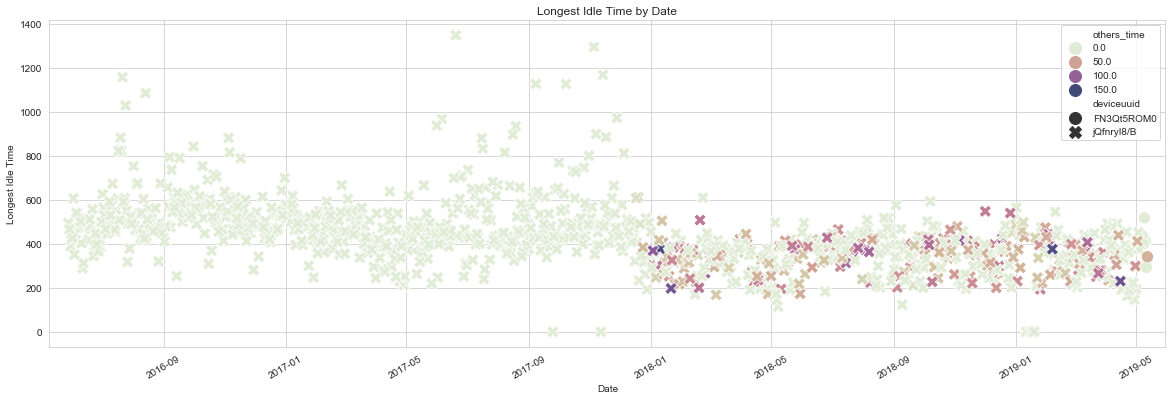

In [109]:
fig = plt.figure(figsize=(20, 6))
palette = sns.cubehelix_palette(4, start=2, rot=1, dark=.3, light=.9, as_cmap=True)
ax = sns.scatterplot(data=day_summary_df, x='day_time',y='longest_idle_time', hue='others_time', 
                     palette=palette, style='deviceuuid', s=150)
ax = ax.set(xlabel='Date', ylabel='Longest Idle Time', xlim=('2016-05-10', '2019-05-30'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Longest Idle Time by Date')
plt.show(ax)

#### Step Count by Date

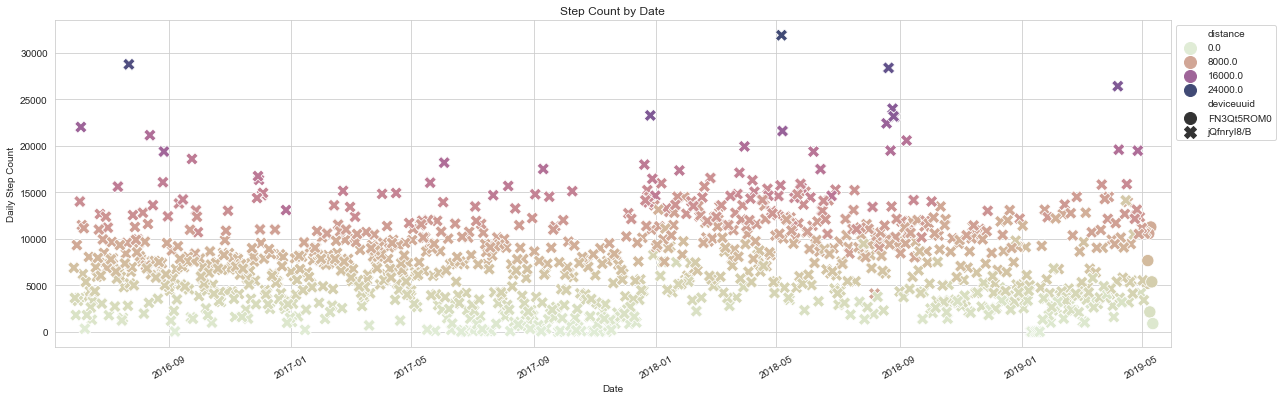

In [119]:
fig = plt.figure(figsize=(20, 6))
palette = sns.cubehelix_palette(4, start=2, rot=1, dark=.3, light=.9, as_cmap=True)
ax = sns.scatterplot(data=day_summary_df[day_summary_df['distance']<23500], x='day_time',y='step_count', 
                     hue='distance', palette=palette, style='deviceuuid', s=150)
ax = ax.set(xlabel='Date', ylabel='Daily Step Count', xlim=('2016-05-10', '2019-05-30'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Step Count by Date')
plt.show(ax)

# Outlier points excluded

#### Walk Time vs Calories Burned

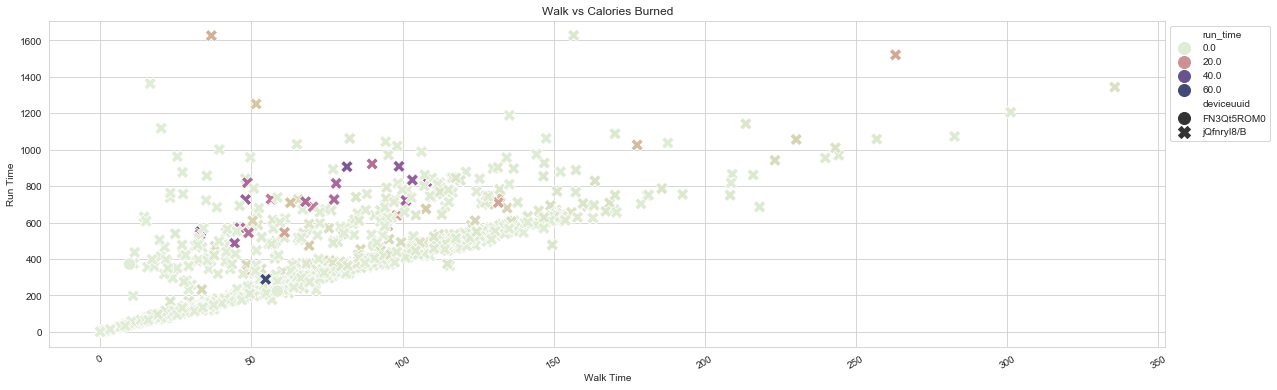

In [111]:
fig = plt.figure(figsize=(20, 6))
palette = sns.cubehelix_palette(4, start=2, rot=1, dark=.3, light=.9, as_cmap=True)
ax = sns.scatterplot(data=day_summary_df, x='walk_time',y='calorie', hue='run_time', palette=palette, 
                     style='deviceuuid', s=150)
ax = ax.set(xlabel='Walk Time', ylabel='Run Time')
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Walk vs Calories Burned')
plt.show(ax)

#### Distance vs Run Time by Date on days over 10km

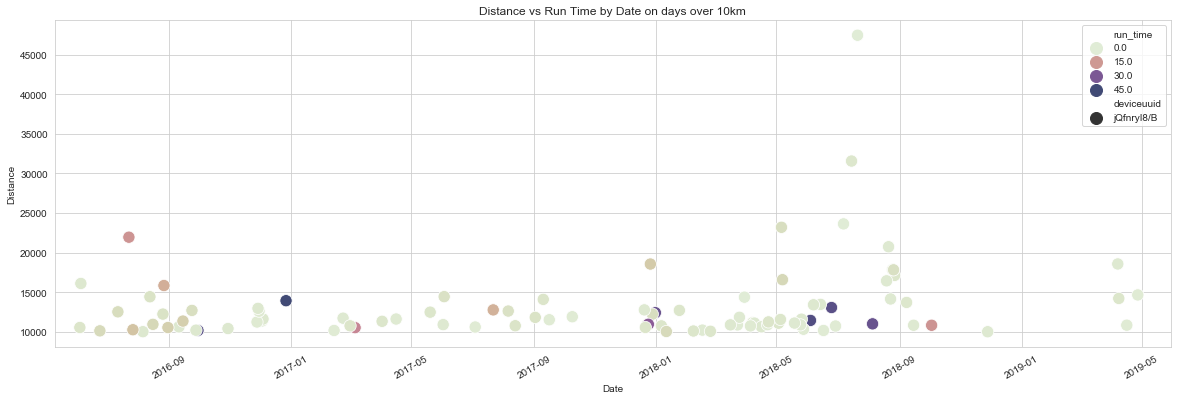

In [112]:
fig = plt.figure(figsize=(20, 6))
palette = sns.cubehelix_palette(4, start=2, rot=1, dark=.3, light=.9, as_cmap=True)
ax = sns.scatterplot(data=day_summary_df[day_summary_df['distance']>10000], x='day_time',y='distance', 
                     hue='run_time', palette=palette, style='deviceuuid', s=150)
ax = ax.set(xlabel='Date', ylabel='Distance', xlim=('2016-05-10', '2019-05-30'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Distance vs Run Time by Date on days over 10km')
plt.show(ax)

#### Correlation heatmap

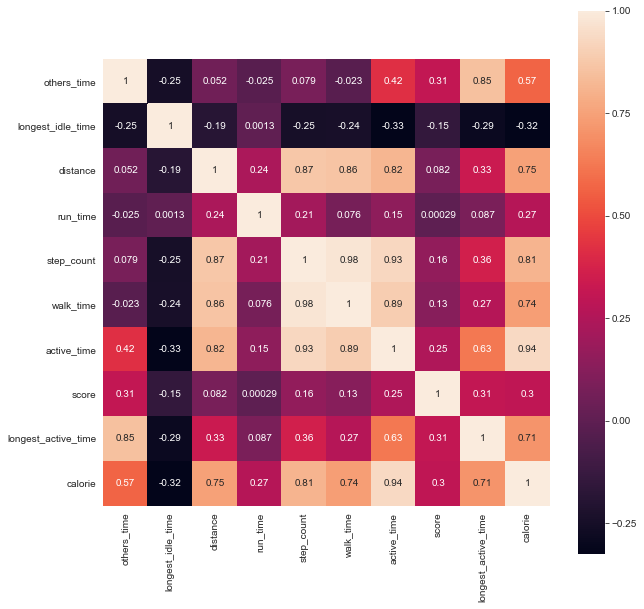

In [164]:
plt.figure(figsize=(10,10))
sns.heatmap(day_summary_df[['others_time','longest_idle_time','distance','run_time',
                            'step_count','walk_time','active_time','score',
                            'longest_active_time','calorie']].corr(), vmax=1, square=True, annot=True)

### Observations

Many of the columns here in day_summary_df match with calories_burned_df:
- active_time
- day_time
- deviceuuid
- calorie ~ active_calorie 

However the daily data captured by day_summary_df spans longer than calories_burned_df. 
day_summary_df starts at 2016-05-29, calories_burned_df starts at 2017-10-30.
Both record daily data up to 2019-05-12.

Score is calculated by (active_time/goal) * 100. Goal is only set on device FN3Qt5ROM0 - there is no goal set on device jQfnryI8/B and thus no score is calculated there.

From some preliminary findings in the scatterplots above, idle time data generally matches step count data. After January 2018 the person became much more active with higher step counts everyday, which correlated to a drop in idle time. Calories burned correlated to walk time fairly well, but not so well compared to run time. Run time also didnt not correlate very well to distance covered. We may find out later the speed that is required for the device jQfnryI8/B to trigger run time.

___

## Exercise_df

In [548]:
exercise_df = pd.read_csv('./Exercise.csv')

In [549]:
exercise_df.head()

Unnamed: 0  max_rpm                                          live_data  \
0           0      NaN  8987be34-bfb3-fd8a-86df-b8124d4a2a1f.live_data...   
1           1      NaN  87ce8240-8476-40bc-e48c-c4fb15fa3755.live_data...   
2           2      NaN  430653c0-1b9f-48d1-bfa8-3479d3fddd9a.live_data...   
3           3      NaN  7d86a3d0-9c24-1e89-aa23-8969edb9f8e3.live_data...   
4           4      NaN  c1221c7f-d679-065c-42c5-a70a6dc0cd9d.live_data...   

   mean_rpm  distance  max_caloricburn_rate  additional  altitude_gain  \
0       NaN   701.459                   NaN         NaN            NaN   
1       NaN  1511.088                   NaN         NaN            NaN   
2       NaN  4188.520                   NaN         NaN            NaN   
3       NaN     0.000                   NaN         NaN            NaN   
4       NaN  1670.411                   NaN         NaN            NaN   

   deviceuuid  duration              update_time  \
0  F/D7+hL5E5    654419  2018-02-07 22:28:19.252   
1  F/D7+hL5E5   1412519  2018-06-15 23:45:03.370   
2  jQfnryI8/B   3367121  2018-03-25 15:40:47.657   
3  F/D7+hL5E5   2550312  2019-05-10 11:51:06.412   
4  F/D7+hL5E5   1680955  2018-03-04 23:26:13.923   

                               datauuid  \
0  8987be34-bfb3-fd8a-86df-b8124d4a2a1f   
1  87ce8240-8476-40bc-e48c-c4fb15fa3755   
2  430653c0-1b9f-48d1-bfa8-3479d3fddd9a   
3  7d86a3d0-9c24-1e89-aa23-8969edb9f8e3   
4  c1221c7f-d679-065c-42c5-a70a6dc0cd9d   

                                       location_data  decline_distance  \
0  8987be34-bfb3-fd8a-86df-b8124d4a2a1f.location_...               NaN   
1  87ce8240-8476-40bc-e48c-c4fb15fa3755.location_...               NaN   
2                                                NaN               NaN   
3  7d86a3d0-9c24-1e89-aa23-8969edb9f8e3.location_...               0.0   
4  c1221c7f-d679-065c-42c5-a70a6dc0cd9d.location_...               NaN   

   altitude_loss  mean_caloricburn_rate  incline_distance  max_altitude  \
0            NaN                    NaN               NaN           NaN   
1            NaN                    NaN               NaN           NaN   
2            NaN                    NaN               NaN           NaN   
3            NaN                    NaN               0.0           NaN   
4            NaN                    NaN               NaN           NaN   

   max_cadence              create_time time_offset  mean_speed  \
0          0.0  2018-02-07 22:28:19.252    UTC-0400    1.307612   
1          0.0  2018-06-15 23:45:03.370    UTC-0300    1.203861   
2          NaN  2018-03-25 15:40:47.657    UTC-0300    1.243947   
3          0.0  2018-03-08 11:32:47.136    UTC-0400    0.000000   
4          0.0  2018-03-04 22:10:48.054    UTC-0400    1.031962   

   mean_heart_rate  count_type  min_altitude  count                 end_time  \
0              0.0         NaN           NaN    NaN  2018-02-07 22:27:17.766   
1              0.0         NaN           NaN    NaN  2018-06-15 23:44:02.630   
2              NaN         NaN           NaN    NaN  2018-03-25 15:23:07.000   
3            139.0         NaN           NaN    NaN  2018-03-08 11:32:46.933   
4              0.0         NaN           NaN    NaN  2018-03-04 21:48:23.708   

   max_speed  exercise_type               start_time  max_power  \
0   1.541910           1001  2018-02-07 22:16:23.347        NaN   
1   1.965237           1001  2018-06-15 23:20:30.111        NaN   
2   1.638889           1001  2018-03-25 14:27:00.000        NaN   
3        NaN              0  2018-03-08 10:50:15.456        NaN   
4   1.333333           1001  2018-03-04 21:20:22.753        NaN   

                      pkg_name  mean_power  min_heart_rate    calorie comment  \
0  com.sec.android.app.shealth         NaN             0.0   40.61000     NaN   
1  com.sec.android.app.shealth         NaN             0.0   88.80000     NaN   
2  com.sec.android.app.shealth         NaN             NaN  221.59999     NaN   
3  com.sec.andro

In [550]:
exercise_df['comment'].unique()

# My boy Azi

array([nan, 'Azi'], dtype=object)

In [551]:
exercise_df.nunique()

Unnamed: 0               1066
max_rpm                     0
live_data                 957
mean_rpm                    0
distance                  785
max_caloricburn_rate        0
additional                  0
altitude_gain               8
deviceuuid                  3
duration                  957
update_time              1066
datauuid                 1066
location_data             870
decline_distance           26
altitude_loss               8
mean_caloricburn_rate       0
incline_distance           26
max_altitude               26
max_cadence                20
create_time              1066
time_offset                 5
mean_speed                782
mean_heart_rate            47
count_type                  2
min_altitude               26
count                       3
end_time                 1066
max_speed                 223
exercise_type               8
start_time               1065
max_power                   0
pkg_name                    1
mean_power                  0
min_heart_

In [552]:
exercise_df.drop(['Unnamed: 0', 'max_rpm', 'live_data', 'mean_rpm', 
                  'max_caloricburn_rate', 'additional', 
                  'datauuid', 'location_data', 'mean_caloricburn_rate',
                  'max_power', 'pkg_name', 'mean_power', 
                  'comment', 'exercise_custom_type'], axis=1, inplace=True)

In [553]:
exercise_df['duration'] = exercise_df['duration']/60000

In [554]:
exercise_df['exercise_type'].unique()

array([ 1001,     0, 14001, 11007,  1002, 15006, 13001,  9002],
      dtype=int64)

In [555]:
exercise_df['count_type'].unique()

array([   nan, 30004., 30001.])

In [556]:
exercise_df.at[exercise_df['exercise_type']==1001, 'exercise_type'] = 'Walking'
exercise_df.at[exercise_df['exercise_type']==1002, 'exercise_type'] = 'Running'
exercise_df.at[exercise_df['exercise_type']==11007, 'exercise_type'] = 'Cycling'
exercise_df.at[exercise_df['exercise_type']==13001, 'exercise_type'] = 'Hiking'
exercise_df.at[exercise_df['exercise_type']==14001, 'exercise_type'] = 'Swimming'
exercise_df.at[exercise_df['exercise_type']==15006, 'exercise_type'] = 'Elliptical'
exercise_df.at[exercise_df['exercise_type']==9002, 'exercise_type'] = 'Yoga'
exercise_df.at[exercise_df['exercise_type']==0, 'exercise_type'] = 'Other'

exercise_df.at[exercise_df['count_type']==30001, 'count_type'] = 'Stride'
exercise_df.at[exercise_df['count_type']==30004, 'count_type'] = 'Repetition'

In [557]:
cols = exercise_df.columns.tolist()
cols = ['deviceuuid', 'time_offset', 'create_time', 'start_time', 'end_time', 'update_time',
        'distance', 'exercise_type', 'duration', 'calorie', 'mean_speed', 'max_speed', 
        'count', 'count_type', 'altitude_gain', 'altitude_loss', 'incline_distance', 'decline_distance',
        'min_altitude', 'max_altitude', 'mean_cadence', 'max_cadence', 
        'min_heart_rate', 'mean_heart_rate', 'max_heart_rate']
exercise_df = exercise_df[cols]

In [558]:
exercise_df

deviceuuid time_offset              create_time  \
0     F/D7+hL5E5    UTC-0400  2018-02-07 22:28:19.252   
1     F/D7+hL5E5    UTC-0300  2018-06-15 23:45:03.370   
2     jQfnryI8/B    UTC-0300  2018-03-25 15:40:47.657   
3     F/D7+hL5E5    UTC-0400  2018-03-08 11:32:47.136   
4     F/D7+hL5E5    UTC-0400  2018-03-04 22:10:48.054   
5     F/D7+hL5E5    UTC-0400  2018-02-05 13:15:00.609   
6     F/D7+hL5E5    UTC-0400  2018-02-21 00:42:36.443   
7     F/D7+hL5E5    UTC-0300  2018-04-05 11:50:03.392   
8     F/D7+hL5E5    UTC-0700  2017-12-22 00:30:06.972   
9     jQfnryI8/B    UTC-0300  2018-04-12 02:36:31.541   
10    F/D7+hL5E5    UTC-0300  2018-04-24 00:24:51.434   
11    F/D7+hL5E5    UTC-0300  2018-03-16 21:26:39.581   
12    jQfnryI8/B    UTC-0300  2018-06-07 23:57:56.354   
13    jQfnryI8/B    UTC-0300  2018-06-20 12:38:19.738   
14    F/D7+hL5E5    UTC-0300  2018-05-17 20:28:33.490   
15    F/D7+hL5E5    UTC-0300  2018-03-31 12:53:04.514   
16    jQfnryI8/B    UTC-0300  2018-04-12 23:21:55.807   
17    F/D7+hL5E5    UTC-0400  2018-03-02 22:46:20.982   
18    jQfnryI8/B    UTC-0300  2018-04-02 11:42:20.060   
19    jQfnryI8/B    UTC-0400  2018-01-31 13:14:28.274   
20    F/D7+hL5E5    UTC-0400  2018-02-28 13:05:02.244   
21    F/D7+hL5E5    UTC-0400  2018-02-18 19:15:35.249   
22    F/D7+hL5E5    UTC-0300  2018-03-25 19:28:43.461   
23    jQfnryI8/B    UTC-0300  2018-05-24 12:24:01.857   
24    jQfnryI8/B    UTC-0300  2018-05-29 00:43:41.406   
25    jQfnryI8/B    UTC-0300  2018-03-20 23:07:06.503   
26    F/D7+hL5E5    UTC-0400  2018-01-03 21:14:07.428   
27    F/D7+hL5E5    UTC-0300  2018-05-15 23:51:40.562   
28    F/D7+hL5E5    UTC-0400  2018-01-20 22:10:56.845   
29    jQfnryI8/B    UTC-0400  2018-03-01 22:55:54.387   
...          ...         ...                      ...   
1036  F/D7+hL5E5    UTC-0300  2019-04-08 17:47:53.288   
1037  F/D7+hL5E5    UTC-0600  2019-04-17 03:04:34.396   
1038  F/D7+hL5E5    UTC-0600  2019-04-27 19:34:13.258   
1039  F/D7+hL5E5    UTC-0600  2019-04-17 02:37:49.316   
1040  F/D7+hL5E5    UTC-0600  2019-04-17 23:23:54.945   
1041  F/D7+hL5E5    UTC-0300  2019-04-30 23:42:42.307   
1042  F/D7+hL5E5    UTC-0600  2019-04-17 23:56:25.464   
1043  jQfnryI8/B    UTC-0600  2019-04-17 02:44:18.271   
1044  F/D7+hL5E5    UTC-0600  2019-04-23 02:33:16.353   
1045  F/D7+hL5E5    UTC-0600  2019-04-16 23:57:24.335   
1046  jQfnryI8/B    UTC-0600  2019-04-27 20:26:31.359   
1047  F/D7+hL5E5    UTC-0600  2019-04-27 21:05:21.326   
1048  jQfnryI8/B    UTC-0600  2019-04-18 03:36:56.489   
1049  jQfnryI8/B    UTC-0300  2019-04-29 22:29:55.903   
1050  F/D7+hL5E5    UTC-0600  2019-04-16 22:30:07.557   
1051  F/D7+hL5E5    UTC-0600  2019-04-27 02:52:04.287   
1052  jQfnryI8/B    UTC-0600  2019-04-27 21:08:09.212   
1053  F/D7+hL5E5    UTC-0600  2019-04-15 22:41:10.226   
1054  jQfnryI8/B    UTC-0600  2019-04-25 01:56:53.014   
1055  jQfnryI8/B    UTC-0600  2019-04-16 22:32:12.661   
1056  jQfnryI8/B    UTC-0300  2019-05-06 20:46:46.450   
1057  F/D7+hL5E5    UTC-0300  2019-04-29 22:34:32.558   
1058  F/D7+hL5E5    UTC-0600  2019-04-25 01:49:51.759   
1059  F/D7+hL5E5    UTC-0600  2019-04-16 22:51:12.313   
1060  F/D7+hL5E5    UTC-0300  2019-04-29 13:20:29.304   
1061  F/D7+hL5E5    UTC-0300  2019-05-10 12:12:15.607   
1062  jQfnryI8/B    UTC-0300  2019-05-10 12:54:59.824   
1063  FN3Qt5ROM0    UTC-0300  2019-05-11 00:00:22.329   
1064  F/D7+hL5E5    UTC-0300  2019-05-10 22:31:50.668   
1065  FN3Qt5ROM0    UTC-0300  2019-05-12 14:26:26.308   

                   start_time                 end_time  \
0     2018-02-07 22:16:23.347  2018-02-07 22:27:17.766   
1     2018-06-15 23:20:30.111  2018-06-15 23:44:02.630   
2     2018-03-25 14:27:00.000  2018-03-25 15:23:07.000   
3     2018-03-08 10:50:15.456  2018-03-08 11:32:46.933   
4     2018-03-04 21:20:22.753  2018-03-04 21:48:23.708   
5     2018-02-05 13:02:14.387  2018-02-05 13:13:59.670   
6     2018-02-21 00:27:26.764  2018-02-21 00:41:34.706   
7     2

In [559]:
exercise_df['create_time'] = pd.to_datetime(exercise_df['create_time'])
exercise_df['start_time'] = pd.to_datetime(exercise_df['start_time'])
exercise_df['end_time'] = pd.to_datetime(exercise_df['end_time'])
exercise_df['update_time'] = pd.to_datetime(exercise_df['update_time'])

In [560]:
# Time offset calculations

exercise_df['time_delta'] = exercise_df.time_offset.str[5]
exercise_df['time_delta'] = pd.to_numeric(exercise_df['time_delta'], errors='coerce')
exercise_df['time_delta'] = pd.to_timedelta(exercise_df['time_delta'],unit='hours')

In [562]:
ex_plus_df = exercise_df[exercise_df.time_offset == 'UTC+0300']
ex_minus_df = exercise_df[exercise_df.time_offset != 'UTC+0300']

ex_plus_df['start_time'] = ex_plus_df['start_time'] + ex_plus_df['time_delta']
ex_plus_df['end_time'] = ex_plus_df['end_time'] + ex_plus_df['time_delta']
ex_plus_df['create_time'] = ex_plus_df['create_time'] + ex_plus_df['time_delta']
ex_plus_df['update_time'] = ex_plus_df['update_time'] + ex_plus_df['time_delta']

ex_minus_df['start_time'] = ex_minus_df['start_time'] - ex_minus_df['time_delta']
ex_minus_df['end_time'] = ex_minus_df['end_time'] - ex_minus_df['time_delta']
ex_minus_df['create_time'] = ex_minus_df['create_time'] - ex_minus_df['time_delta']
ex_minus_df['update_time'] = ex_minus_df['update_time'] - ex_minus_df['time_delta']

exercise_df = pd.concat([ex_minus_df, ex_plus_df])

In [565]:
exercise_df['dayofweek'] = exercise_df['end_time'].dt.dayofweek
exercise_df.at[exercise_df['dayofweek'] < 5, 'dayofweek'] = 'weekday'
exercise_df.at[((exercise_df['dayofweek'] == 5) | (exercise_df['dayofweek'] == 6)), 'dayofweek'] = 'weekend'

#### Hour of Day Exercise Count, Weekday vs Weekend

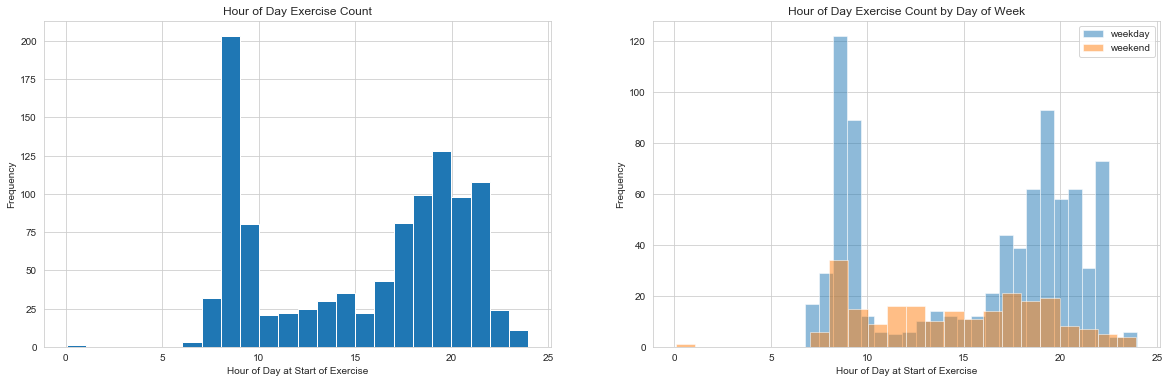

In [566]:
start_exercise_df = (exercise_df['start_time'].dt.hour + 
                     exercise_df['start_time'].dt.minute/60 + 
                     exercise_df['start_time'].dt.second/3600)

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(121)
ax.set_xlabel('Hour of Day at Start of Exercise')
ax.set_ylabel('Frequency')
ax.set_title('Hour of Day Exercise Count')
ax.hist(start_exercise_df, bins=24)

day_week_start_df = pd.concat([start_exercise_df, exercise_df['dayofweek']], axis=1)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Hour of Day at Start of Exercise')
ax2.set_ylabel('Frequency')
ax2.set_title('Hour of Day Exercise Count by Day of Week')
ax2.hist(day_week_start_df[day_week_start_df['dayofweek'] == 'weekday'].iloc[:,0], bins=24, alpha=0.5, label='weekday')
ax2.hist(day_week_start_df[day_week_start_df['dayofweek'] == 'weekend'].iloc[:,0], bins=24, alpha=0.5, label='weekend')
ax2.legend()

#### Exercise Hour vs Distance

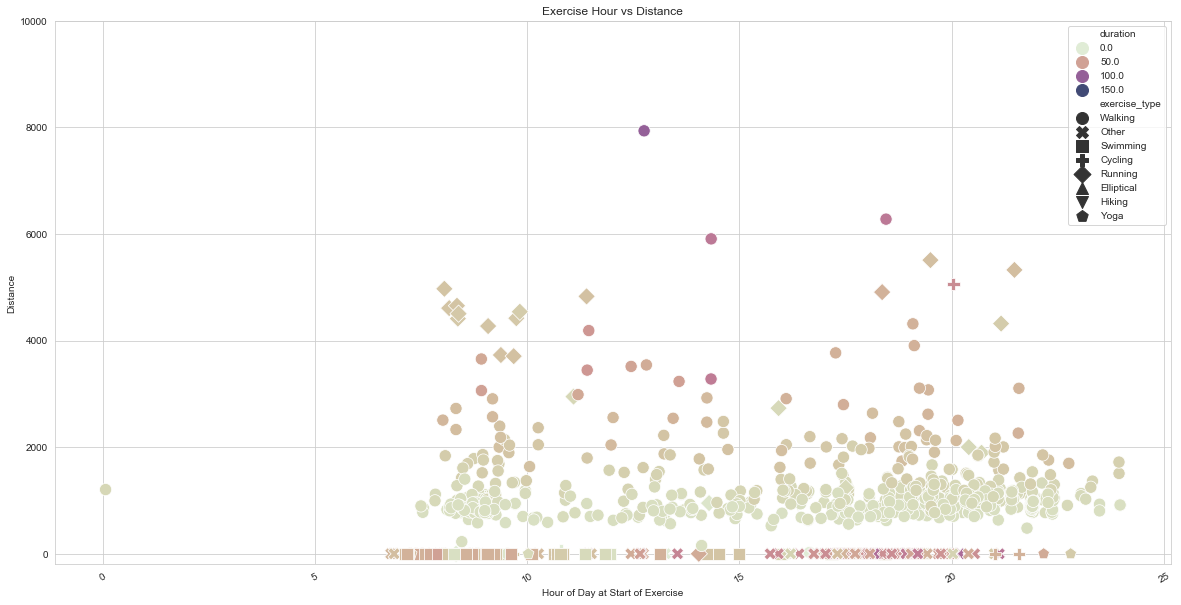

In [567]:
fig = plt.figure(figsize=(20, 10))
palette = sns.cubehelix_palette(4, start=2, rot=1, dark=.3, light=.9, as_cmap=True)
ax = sns.scatterplot(data=pd.concat([start_exercise_df.rename('start_hour'), exercise_df], axis=1), 
                     x='start_hour', y='distance', hue='duration', style='exercise_type', palette=palette, s=150)
ax.set(xlabel='Hour of Day at Start of Exercise', ylabel='Distance', ylim=(-200,10000)) 
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Exercise Hour vs Distance')
plt.show(ax)

#### Duration by Date - Time_offset colorcoding

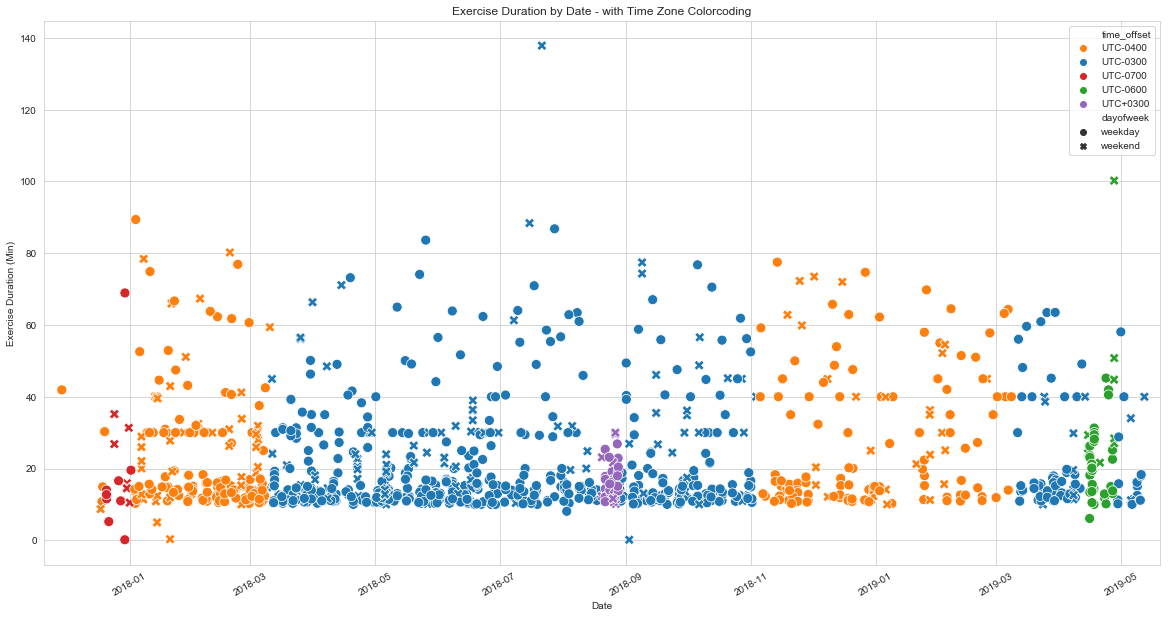

In [568]:
fig = plt.figure(figsize=(20, 10))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0600":"C2", "UTC-0700":"C3", "UTC+0300":"C4"}
ax = sns.scatterplot(data=exercise_df, x='end_time',y='duration', hue='time_offset', palette=palette, style='dayofweek', s=100)
ax = ax.set(xlabel='Date', ylabel='Exercise Duration (Min)', xlim=('2017-11-20', '2019-05-20'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1))
plt.title('Exercise Duration by Date - with Time Zone Colorcoding')
plt.show(ax)

# Some sparse points before 2018 are cut off

#### Exercise Duration by Date - Exercise Type colorcoding

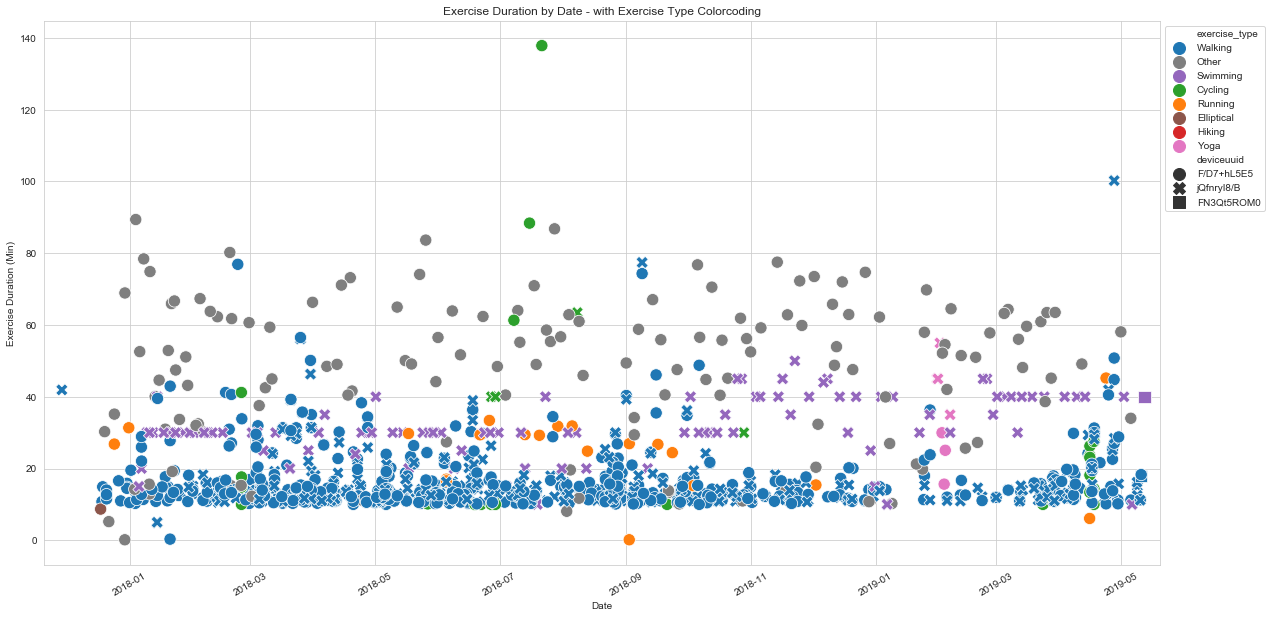

In [569]:
fig = plt.figure(figsize=(20, 10))
palette = {"Walking":"C0","Running":"C1","Cycling":"C2","Hiking":"C3","Swimming":"C4","Elliptical":"C5","Yoga":"C6","Other":"C7"}
ax = sns.scatterplot(data=exercise_df, x='end_time',y='duration', hue='exercise_type', palette=palette, style='deviceuuid', s=150)
ax = ax.set(xlabel='Date', ylabel='Exercise Duration (Min)', xlim=('2017-11-20', '2019-05-20'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Exercise Duration by Date - with Exercise Type Colorcoding')
plt.show(ax)

In [570]:
exercise_df[exercise_df['deviceuuid']=='FN3Qt5ROM0']

deviceuuid time_offset             create_time          start_time  \
1063  FN3Qt5ROM0    UTC-0300 2019-05-10 21:00:22.329 2019-05-10 19:09:20   
1065  FN3Qt5ROM0    UTC-0300 2019-05-12 11:26:26.308 2019-05-12 08:33:00   

                end_time             update_time  distance exercise_type  \
1063 2019-05-10 19:27:15 2019-05-10 21:00:22.329   1264.27       Walking   
1065 2019-05-12 09:13:00 2019-05-12 11:26:29.055      0.00      Swimming   

      duration  calorie  mean_speed  max_speed  count  count_type  \
1063  17.91755    93.76    1.176007   1.777778    NaN         NaN   
1065  40.00000   336.00    0.000000        NaN    0.0  Repetition   

      altitude_gain  altitude_loss  incline_distance  decline_distance  \
1063            NaN            NaN               NaN               NaN   
1065            NaN            NaN               NaN               NaN   

      min_altitude  max_altitude  mean_cadence  max_cadence  min_heart_rate  \
1063           NaN           NaN           NaN          NaN             NaN   
1065           NaN           NaN           NaN          NaN             NaN   

      mean_heart_rate  max_heart_rate time_delta dayofweek  
1063              NaN             NaN   03:00:00   weekday  
1065              NaN             NaN   03:00:00   weekend

#### Correlation heatmap

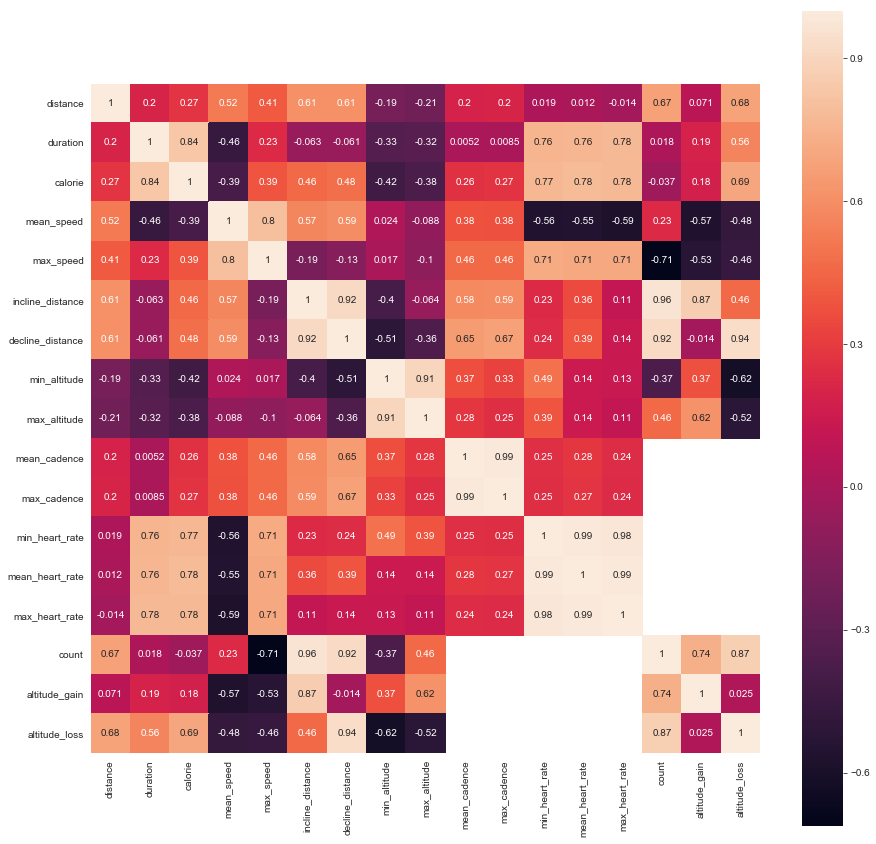

In [571]:
plt.figure(figsize=(15,15))
sns.heatmap(exercise_df[['distance','duration','calorie','mean_speed',
                         'max_speed', 'incline_distance','decline_distance','min_altitude',
                         'max_altitude','mean_cadence', 'max_cadence',
                         'min_heart_rate', 'mean_heart_rate', 'max_heart_rate',
                         'count','altitude_gain','altitude_loss']].corr(), vmax=1, square=True, annot=True)

### Observations 

- Most data occurs between late 2017 and early May 2018
- Majority of exercise occures at 7:30-8AM, very likely morning school/work commute time - Distance covered here is mostly around 1000m
- Majority of exercise duration falls below 20 minutes
- About a third of the data is recorded on a separate device - Swimming data is recorded exclusively with device 'jQfnryI8/B' suggesting a smartwatch. The other device is not a phone because it records heart rate as well.
- 'Other' exercise consists of high heart rate and 0 distance records - I have inferred that the person is most likely doing skipping rope exercises 
- Found in one row of the 'comment' column is the word 'Azi', suggesting this is the person's name whom all the data belongs to.

____

## Floors_climbed

In [589]:
floors_climbed_df = pd.read_csv('./floors_climbed.csv')

In [590]:
floors_climbed_df.head()

Unnamed: 0               start_time                     pkg_name  \
0           0  2018-05-02 12:42:15.000  com.sec.android.app.shealth   
1           1  2018-05-06 14:20:14.000  com.sec.android.app.shealth   
2           2  2018-05-02 12:35:06.000  com.sec.android.app.shealth   
3           3  2018-04-11 12:12:47.000  com.sec.android.app.shealth   
4           4  2018-04-26 23:02:45.000  com.sec.android.app.shealth   

               update_time              create_time time_offset  \
0  2018-05-02 12:49:48.489  2018-05-02 12:49:48.475    UTC-0300   
1  2018-05-06 14:29:13.042  2018-05-06 14:29:13.041    UTC-0300   
2  2018-05-02 12:49:48.456  2018-05-02 12:49:48.456    UTC-0300   
3  2018-04-11 12:17:26.692  2018-04-11 12:17:26.692    UTC-0300   
4  2018-04-26 23:10:57.723  2018-04-26 23:10:57.722    UTC-0300   

                               datauuid  custom                 end_time  \
0  e4c884ab-eff3-d1bb-e518-c2aae50809a8     NaN  2018-05-02 12:42:28.000   
1  9c540db5-3893-db29-0395-282bcdad84e0     NaN  2018-05-06 14:20:21.000   
2  f133a106-1db6-cdd1-4236-49f945694d6a     NaN  2018-05-02 12:35:18.000   
3  e400bf12-d0a1-c8d9-022d-6a8ff36e9f32     NaN  2018-04-11 12:13:15.000   
4  9d592d6f-cd60-dd1c-2aed-964fbd7f43f1     NaN  2018-04-26 23:03:13.000   

   floor  deviceuuid  
0    1.0  F/D7+hL5E5  
1    1.0  F/D7+hL5E5  
2    1.0  F/D7+hL5E5  
3    1.0  F/D7+hL5E5  
4    1.0  F/D7+hL5E5

In [591]:
floors_climbed_df.nunique()

Unnamed: 0     1518
start_time     1518
pkg_name          1
update_time    1518
create_time    1518
time_offset       5
datauuid       1518
custom            0
end_time       1518
floor            19
deviceuuid        1
dtype: int64

In [592]:
floors_climbed_df.drop(['Unnamed: 0', 'pkg_name', 'datauuid', 'custom'], axis=1, inplace=True)

In [593]:
floors_climbed_df['create_time'] = pd.to_datetime(floors_climbed_df['create_time'])
floors_climbed_df['start_time'] = pd.to_datetime(floors_climbed_df['start_time'])
floors_climbed_df['end_time'] = pd.to_datetime(floors_climbed_df['end_time'])
floors_climbed_df['update_time'] = pd.to_datetime(floors_climbed_df['update_time'])

In [594]:
floors_climbed_df['time_delta'] = floors_climbed_df.time_offset.str[5]
floors_climbed_df['time_delta'] = pd.to_numeric(floors_climbed_df['time_delta'], errors='coerce')
floors_climbed_df['time_delta'] = pd.to_timedelta(floors_climbed_df['time_delta'],unit='hours')

In [595]:
floor_plus_df = floors_climbed_df[floors_climbed_df.time_offset == 'UTC+0300']
floor_minus_df = floors_climbed_df[floors_climbed_df.time_offset != 'UTC+0300']

floor_plus_df['start_time'] = floor_plus_df['start_time'] + floor_plus_df['time_delta']
floor_plus_df['end_time'] = floor_plus_df['end_time'] + floor_plus_df['time_delta']
floor_plus_df['create_time'] = floor_plus_df['create_time'] + floor_plus_df['time_delta']
floor_plus_df['update_time'] = floor_plus_df['update_time'] + floor_plus_df['time_delta']

floor_minus_df['start_time'] = floor_minus_df['start_time'] - floor_minus_df['time_delta']
floor_minus_df['end_time'] = floor_minus_df['end_time'] - floor_minus_df['time_delta']
floor_minus_df['create_time'] = floor_minus_df['create_time'] - floor_minus_df['time_delta']
floor_minus_df['update_time'] = floor_minus_df['update_time'] - floor_minus_df['time_delta']

floors_climbed_df = pd.concat([floor_minus_df, floor_plus_df])

In [596]:
floors_climbed_df['floor_hour'] = floors_climbed_df['end_time'].dt.hour
floors_climbed_df['floor_date'] = floors_climbed_df['end_time'].dt.date

In [597]:
# split hours into morning, afternoon and evening for floor aggregation
floors_climbed_df.at[floors_climbed_df['floor_hour'] < 10, 'time_of_day'] = 'morning'
floors_climbed_df.at[((floors_climbed_df['floor_hour'] >= 10) 
                      & (floors_climbed_df['floor_hour'] < 18)), 'time_of_day'] = 'afternoon'
floors_climbed_df.at[floors_climbed_df['floor_hour'] >= 18, 'time_of_day'] = 'evening'


In [598]:
# weekday and weekend filtering
floors_climbed_df['dayofweek'] = floors_climbed_df['end_time'].dt.dayofweek
floors_climbed_df.at[floors_climbed_df['dayofweek'] < 5, 'dayofweek'] = 'weekday'
floors_climbed_df.at[((floors_climbed_df['dayofweek'] == 5) | (floors_climbed_df['dayofweek'] == 6)), 'dayofweek'] = 'weekend'

In [599]:
floors_climbed_df

start_time             update_time             create_time  \
0   2018-05-02 09:42:15 2018-05-02 09:49:48.489 2018-05-02 09:49:48.475   
1   2018-05-06 11:20:14 2018-05-06 11:29:13.042 2018-05-06 11:29:13.041   
2   2018-05-02 09:35:06 2018-05-02 09:49:48.456 2018-05-02 09:49:48.456   
3   2018-04-11 09:12:47 2018-04-11 09:17:26.692 2018-04-11 09:17:26.692   
4   2018-04-26 20:02:45 2018-04-26 20:10:57.723 2018-04-26 20:10:57.722   
5   2018-01-01 13:24:21 2018-01-01 13:27:36.611 2018-01-01 13:27:36.594   
6   2018-04-26 20:08:51 2018-04-26 20:10:57.848 2018-04-26 20:10:57.743   
7   2018-02-05 19:47:35 2018-02-05 19:49:28.369 2018-02-05 19:49:28.287   
8   2018-04-09 08:39:46 2018-04-09 08:41:28.669 2018-04-09 08:41:28.667   
9   2018-04-16 17:28:01 2018-04-16 17:57:01.977 2018-04-16 17:57:01.953   
10  2018-04-12 09:21:48 2018-04-12 09:24:15.789 2018-04-12 09:24:15.669   
11  2018-04-02 16:50:38 2018-04-02 16:52:22.914 2018-04-02 16:52:22.881   
12  2018-01-31 09:11:05 2018-01-31 09:11:22.912 2018-01-31 09:11:17.909   
13  2018-04-11 20:53:18 2018-04-11 20:59:30.464 2018-04-11 20:59:30.406   
14  2017-12-31 20:24:00 2017-12-31 20:29:21.926 2017-12-31 20:29:21.921   
15  2018-04-02 16:39:35 2018-04-02 16:42:20.098 2018-04-02 16:42:20.035   
16  2018-04-23 15:27:35 2018-04-23 15:42:22.662 2018-04-23 15:42:22.646   
17  2018-03-08 19:28:35 2018-03-08 19:34:22.116 2018-03-08 19:34:22.099   
18  2018-03-21 21:58:20 2018-03-21 22:58:08.677 2018-03-21 22:58:08.632   
19  2018-04-14 16:21:32 2018-04-14 16:26:15.200 2018-04-14 16:26:15.200   
20  2018-05-08 16:51:39 2018-05-08 16:52:43.727 2018-05-08 16:52:43.699   
21  2017-12-31 22:05:20 2017-12-31 22:10:56.889 2017-12-31 22:10:56.889   
22  2018-01-24 09:44:46 2018-01-24 09:50:41.083 2018-01-24 09:50:41.040   
23  2018-03-02 19:42:15 2018-03-02 19:43:28.481 2018-03-02 19:43:28.480   
24  2018-05-11 08:39:55 2018-05-11 08:41:44.858 2018-05-11 08:41:44.799   
25  2018-03-07 18:22:12 2018-03-07 18:24:12.734 2018-03-07 18:22:23.707   
26  2017-12-24 09:44:06 2017-12-24 09:48:39.758 2017-12-24 09:44:19.862   
27  2018-04-17 18:13:33 2018-04-17 18:27:57.188 2018-04-17 18:27:57.186   
28  2018-04-17 09:51:31 2018-04-17 09:59:11.916 2018-04-17 09:59:11.915   
29  2018-03-15 18:52:22 2018-03-15 19:50:06.886 2018-03-15 19:50:06.768   
..                  ...                     ...                     ...   
663 2018-08-24 21:23:22 2018-08-24 21:41:13.906 2018-08-24 21:41:13.895   
664 2018-08-26 18:50:00 2018-08-26 18:56:06.701 2018-08-26 18:56:06.660   
683 2018-08-25 16:53:59 2018-08-25 16:54:21.049 2018-08-25 16:54:21.032   
687 2018-08-19 19:37:18 2018-08-19 19:37:46.100 2018-08-19 19:37:41.758   
701 2018-08-20 12:08:13 2018-08-20 12:10:18.076 2018-08-20 12:10:18.075   
703 2018-08-23 18:18:41 2018-08-23 18:24:57.298 2018-08-23 18:24:57.287   
709 2018-08-23 19:46:45 2018-08-23 19:52:33.752 2018-08-23 19:47:59.326   
714 2018-08-25 22:30:39 2018-08-25 22:56:53.285 2018-08-25 22:31:39.303   
719 2018-08-21 12:00:47 2018-08-21 12:04:47.558 2018-08-21 12:04:47.558   
730 2018-08-26 00:57:42 2018-08-26 01:00:12.183 2018-08-26 01:00:12.183   
734 2018-08-28 16:17:14 2018-08-28 17:12:09.187 2018-08-28 17:12:09.186   
744 2018-08-28 20:04:15 2018-08-28 20:04:33.208 2018-08-28 20:04:33.207   
750 2018-08-20 21:53:22 2018-08-20 22:00:01.103 2018-08-20 22:00:01.053   
760 2018-08-25 17:30:44 2018-08-25 17:32:40.088 2018-08-25 17:32:40.069   
762 2018-08-23 18:10:48 2018-08-23 18:12:32.369 2018-08-23 18:12:32.323   
780 2018-08-25 19:37:42 2018-08-25 19:45:22.255 2018-08-25 19:45:22.151   
781 2018-08-26 01:09:19 2018-08-26 01:09:49.314 2018-08-26 01:09:49.295   
817 2018-08-22 21:00:18 2018-08-22 21:07:47.174 2018-08-22 21:07:47.153   
840 2018-08-21 11:14:06 2018-08-21 11:16:03.972 2018-08-21 11:16:03.971   
844 2018-08-19 22:25:57 2018-08-19 22:29:58.053 2018-08-19 22:29:58.018   
877 2018-08-21 17:28:05 2018-08-21 17:30:45.050 2018-08-21 17:30:45.033   
887 2018-08-22 11:21:53 2018-08-22 11:

In [600]:
floors_climbed_agg = floors_climbed_df.groupby(['floor_date','time_of_day']).aggregate({'time_offset':'first', 
                                                                                          'floor':'sum',
                                                                                          'dayofweek':'first'})
floors_climbed_agg = floors_climbed_agg.reset_index()

In [601]:
floors_climbed_agg

floor_date time_of_day time_offset  floor dayofweek
0    2017-12-16   afternoon    UTC-0400    1.0   weekend
1    2017-12-16     morning    UTC-0400    9.0   weekend
2    2017-12-17     evening    UTC-0400    9.0   weekend
3    2017-12-18   afternoon    UTC-0400    7.0   weekday
4    2017-12-18     morning    UTC-0400    6.0   weekday
5    2017-12-19   afternoon    UTC-0400    9.0   weekday
6    2017-12-19     evening    UTC-0400    1.0   weekday
7    2017-12-20   afternoon    UTC-0700    5.0   weekday
8    2017-12-20     morning    UTC-0400    2.0   weekday
9    2017-12-21   afternoon    UTC-0700    8.0   weekday
10   2017-12-21     morning    UTC-0700    1.0   weekday
11   2017-12-22   afternoon    UTC-0700    8.0   weekday
12   2017-12-23   afternoon    UTC-0700    7.0   weekend
13   2017-12-23     morning    UTC-0700    3.0   weekend
14   2017-12-24   afternoon    UTC-0700    5.0   weekend
15   2017-12-24     morning    UTC-0700    7.0   weekend
16   2017-12-25   afternoon    UTC-0700   79.0   weekday
17   2017-12-26   afternoon    UTC-0700    1.0   weekday
18   2017-12-27   afternoon    UTC-0700    2.0   weekday
19   2017-12-27     evening    UTC-0700    4.0   weekday
20   2017-12-28   afternoon    UTC-0700    1.0   weekday
21   2017-12-28     evening    UTC-0700    1.0   weekday
22   2017-12-29   afternoon    UTC-0700    5.0   weekday
23   2017-12-30   afternoon    UTC-0700    3.0   weekend
24   2017-12-31   afternoon    UTC-0700   14.0   weekend
25   2017-12-31     evening    UTC-0700    8.0   weekend
26   2018-01-01   afternoon    UTC-0700    1.0   weekday
27   2018-01-02   afternoon    UTC-0400    2.0   weekday
28   2018-01-03   afternoon    UTC-0400   10.0   weekday
29   2018-01-03     evening    UTC-0400    7.0   weekday
..          ...         ...         ...    ...       ...
635  2019-04-17     evening    UTC-0600    9.0   weekday
636  2019-04-19   afternoon    UTC-0600    1.0   weekday
637  2019-04-20   afternoon    UTC-0600   16.0   weekend
638  2019-04-20     evening    UTC-0600    4.0   weekend
639  2019-04-21   afternoon    UTC-0600    3.0   weekend
640  2019-04-22     evening    UTC-0600    3.0   weekday
641  2019-04-23   afternoon    UTC-0600   27.0   weekday
642  2019-04-23     evening    UTC-0600    1.0   weekday
643  2019-04-24     evening    UTC-0600   76.0   weekday
644  2019-04-25   afternoon    UTC-0600    9.0   weekday
645  2019-04-25     evening    UTC-0600    1.0   weekday
646  2019-04-26   afternoon    UTC-0600    6.0   weekday
647  2019-04-26     evening    UTC-0600    1.0   weekday
648  2019-04-27   afternoon    UTC-0600  102.0   weekend
649  2019-04-28     evening    UTC-0600    1.0   weekend
650  2019-04-29   afternoon    UTC-0300    9.0   weekday
651  2019-04-29     evening    UTC-0300   10.0   weekday
652  2019-04-29     morning    UTC-0300    2.0   weekday
653  2019-04-30     evening    UTC-0300    9.0   weekday
654  2019-05-01   afternoon    UTC-0300   16.0   weekday
655  2019-05-01     evening    UTC-0300    7.0   weekday
656  2019-05-01     morning    UTC-0300    1.0   weekday
657  2019-05-02   afternoon    UTC-0300    9.0   weekday
658  2019-05-02     evening    UTC-0300   10.0   weekday
659  2019-05-04   afternoon    UTC-0300    1.0   weekend
660  2019-05-05     evening    UTC-0300   12.0   weekend
661  2019-05-10   afternoon    UTC-0300    7.0   weekday
662  2019-05-10     evening    UTC-0300   14.0   weekday
663  2019-05-10     morning    UTC-0300    2.0   weekday
664  2019-05-11   afternoon    UTC-0300    2.0   weekend

[665 rows x 5 columns]

In [602]:
floors_climbed_agg['time_offset'].unique()

array(['UTC-0400', 'UTC-0700', 'UTC-0300', 'UTC+0300', 'UTC-0600'],
      dtype=object)

#### Floor Climbed, separated by morning/afternoon/evening

12am-10am = morning

10am-6pm = afternoon

6pm-12am = evening

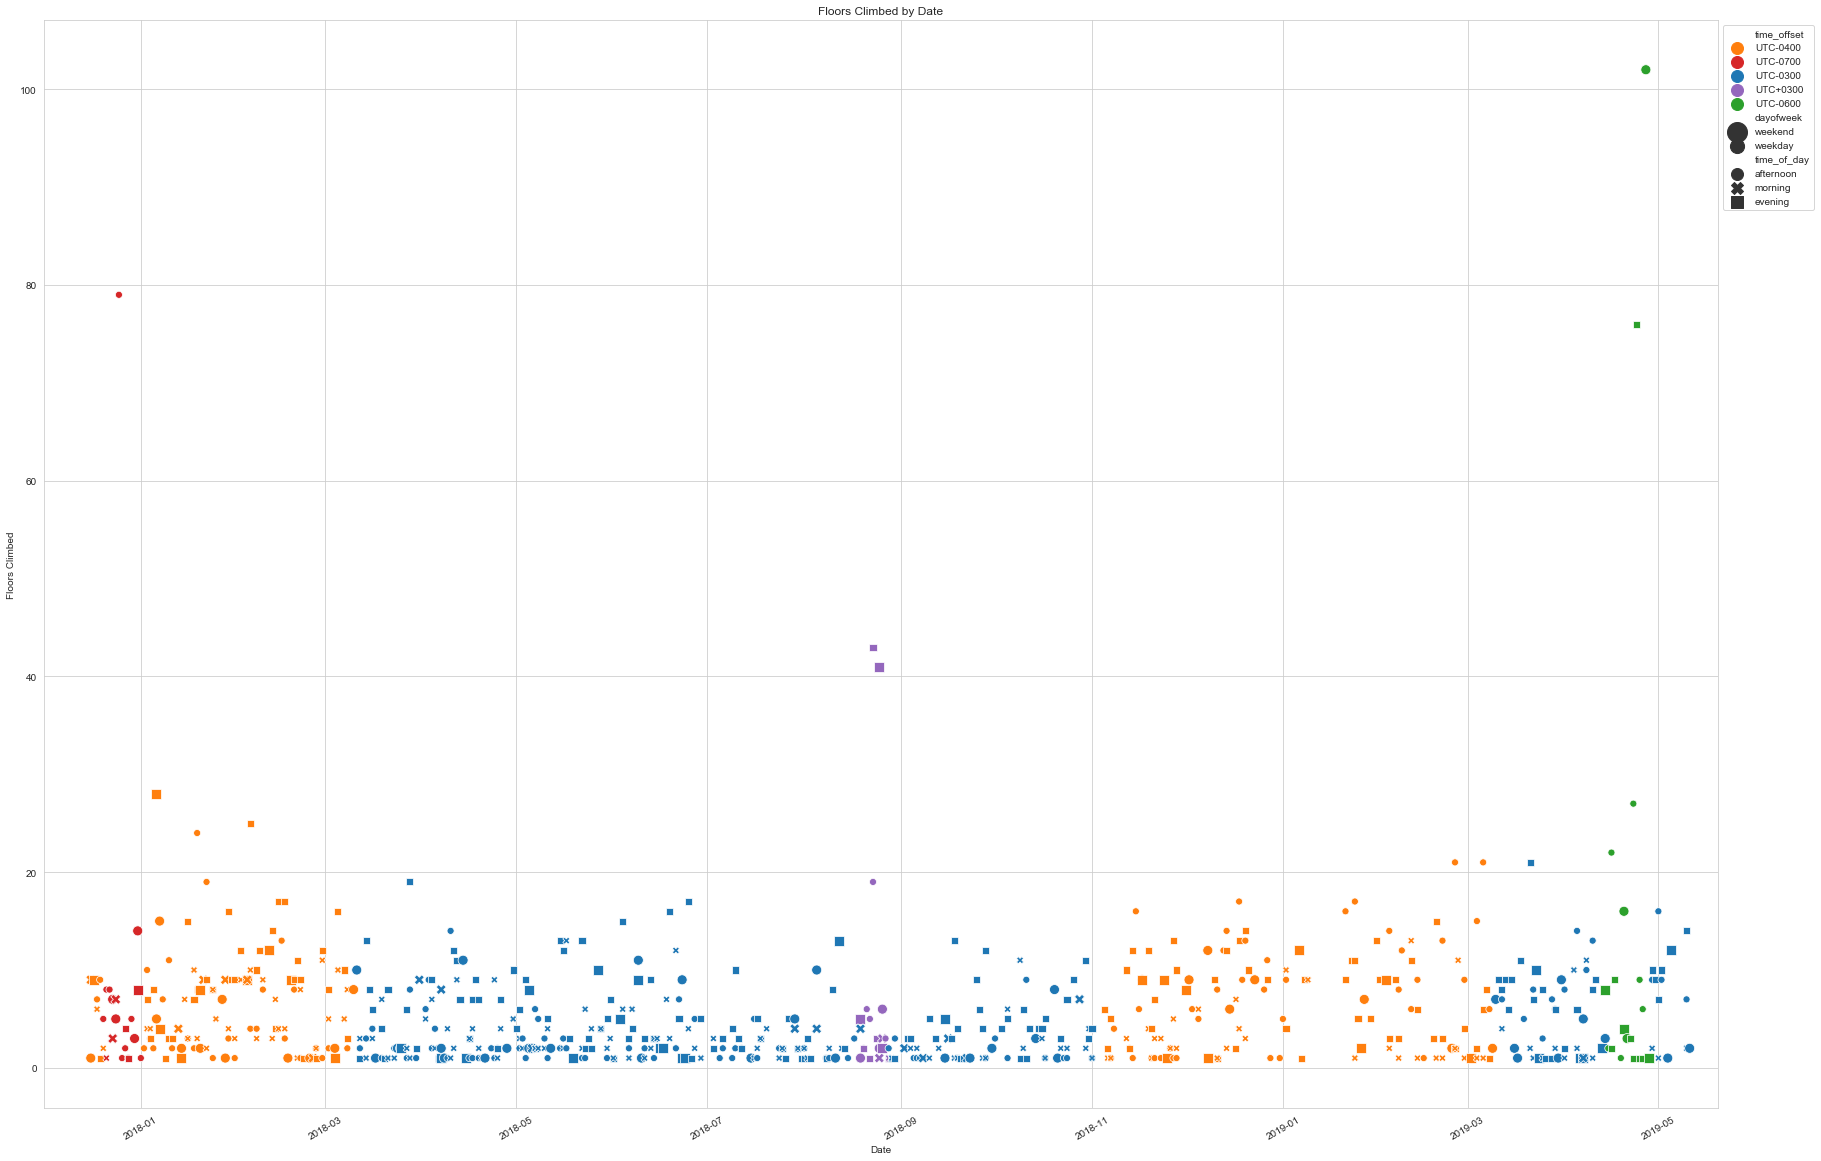

In [606]:
fig = plt.figure(figsize=(30, 20))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0600":"C2", "UTC-0700":"C3", "UTC+0300":"C4"}
ax = sns.scatterplot(data=floors_climbed_agg, x='floor_date',y='floor', hue='time_offset', 
                     palette=palette, style='time_of_day', size='dayofweek', sizes=[100, 50])
ax = ax.set(xlabel='Date', ylabel='Floors Climbed', xlim=('2017-12-01', '2019-05-20'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Floors Climbed by Date')
plt.show(ax)

### Observations

- This person climbs a varied amount of floors on a day-to-day basis. This may suggest that their work/school related activities involves going to different buildings and settings.
- Amazingly, this person climbed 79 floors on Christmas of 2017, while on holiday in another timezone. They climbed around the same amount of stairs again on 2 occasions in the same timezone in late April of 2019. The invidiual must have decided to do a stair challenge every time they went to this timezone, or did a lot of uphill hiking.

____

## Sleep_df

In [573]:
sleep_df = pd.read_csv('./sleep.csv')


In [574]:
sleep_df

Unnamed: 0     com.samsung.health.sleep.datauuid  efficiency  \
0             0  5ae9435a-9184-9741-ecc9-d30f2855ea09   86.653770   
1             1  e4f5dec4-b492-88b8-f89f-a30bffc7c8dc   92.362770   
2             2  d5712eb4-d002-3f81-1594-a9d6e8b6a0d0   70.967740   
3             3  440a44c6-a8ee-ecd9-8f96-7b62429d46e9   93.589745   
4             4  604fa367-bfab-801d-db26-b75b21a92c61   91.623040   
5             5  3a95d014-e08a-eff8-ce9f-665ba7155e30   87.473460   
6             6  5935ece5-0c3b-4e55-5e14-ab72f2f5021f   93.269226   
7             7  a9b283f7-f02b-6e20-0fc6-c66d4a4cb95b   87.500000   
8             8  9fb92d1b-a102-be22-1c53-53c0246ee1af    0.000000   
9             9  4f3a6409-0ad8-c03e-a02f-0c74f9845c64   83.333330   
10           10  4d54798b-87c9-3988-46ae-3ecbb5042e1d   91.780820   
11           11  c01e6367-fa1a-5032-6550-a8932f7b2222   92.109770   
12           12  7c7970d9-e76a-bb03-fd36-6a8286852810   85.263150   
13           13  6f036005-9da8-81b4-d5ef-c818578da542   82.022470   
14           14  fd50d8c9-fd11-b1e0-011f-10714d984fac   93.561370   
15           15  7213f818-a3f5-8acc-c41d-7aecb203ce1b   88.974360   
16           16  ee64d249-08fd-ad84-d800-d59ba6262b5b   89.662025   
17           17  522facda-44c7-0c99-089d-a5db39ce3ef0   92.207790   
18           18  d5997037-9343-47a2-5d3d-eab2c6fc820c   91.891890   
19           19  ac946421-37d8-39d8-c635-ae14edbb0c95   94.472360   
20           20  a29b1248-9b32-28e4-cc7d-5cc44fc3319b    0.000000   
21           21  26e39a14-d426-66b4-f255-da267d0c4aad   92.821785   
22           22  eba4a522-15a0-c6a0-3285-b309eb154fc4   86.000000   
23           23  08b8cbd8-ef69-b0b3-8277-bd2fb80168d9   92.400000   
24           24  4590cfb4-55b7-c57e-60b2-9ce972b43b3d   92.427620   
25           25  046939d4-b70c-e404-729a-440901580f8a   92.271660   
26           26  7c701a40-4bb2-932b-c664-5e211bf1e815   95.945946   
27           27  d8149959-71ff-6cd9-2525-1707c1d6cfdb   93.435450   
28           28  97b7c170-54de-b04a-8530-ea5b8ce0bb88   91.466080   
29           29  404a8019-49ad-71bd-1498-1a6f5944f850   96.385544   
..          ...                                   ...         ...   
632         632  df7feec3-218b-816e-505d-92ba65210eb0   65.000000   
633         633  c13e1518-e060-2f78-fe54-5d607b71cfd6   95.000000   
634         634  b5690ced-c1f9-6efe-2928-426cc3b5bce7   93.217390   
635         635  3ac617aa-43fd-4693-a573-5e72b6d93e42    0.000000   
636         636  1a056b99-2a53-cdb7-6fd5-b1cf76a9392f   50.000000   
637         637  b805210e-83db-0496-6f1d-e697de934300   63.000000   
638         638  2ed7134e-d2a2-1f6e-5da5-4557fe62af7d   84.000000   
639         639  4ce90e9e-9d14-17fd-3e27-87f4a69526a4   93.000000   
640         640  cf7c1e83-fc86-c5ce-3e3b-28710c90f4cc   88.000000   
641         641  837210a7-6d89-93e4-b5cd-f18ca819ac31   88.000000   
642         642  a88b1812-fef6-bf1d-3969-e6a04c8f26e4   88.000000   
643         643  87fe04d2-f10c-ecb8-c15b-46a6749c22a9   85.000000   
644         644  c5950838-0ad3-24c3-2036-aa5c3e3c73ec   87.000000   
645         645  8772d964-ed9d-7519-79ae-40efa23541a6   83.000000   
646         646  7e8c0e15-adf3-4a3b-a726-99f2d4795494    0.000000   
647         647  d0a27e6e-8024-195f-76c9-343d736861a1   88.000000   
648         648  a05dbc71-5b92-8853-1cd1-758dfb9263a3   85.000000   
649         649  9acf1cdf-ba07-792b-975f-1fc154ed8a57   85.000000   
650         650  cb3b95bf-66f8-aa81-5520-3141ca0a73b2   60.000000   
651         651  75815331-5faf-4ed6-cd36-2755868bfbaa   92.000000   
652         652  d8f13de6-4cd9-4bde-a78f-7df26200f760    0.000000   
653         653  bcd72867-4289-4879-e746-6b845acf1132   88.000000   
654         654  926b2a60-d768-c9da-0973-4ba3a6df252b   91.000000   
655         655  c577d2e9-3fa0-1f11-fe5f-ce0edcaaabd9   73.000000   
656         656  17cc54f2-18a1-5361-a065-1573a55f1790   87.000000   
657         657  7566450e-b374-4f6f-abb7-e3e8ead0d503    0.000000   
658

In [575]:
sleep_df.nunique()

Unnamed: 0                              662
com.samsung.health.sleep.datauuid       662
efficiency                              487
original_efficiency                      36
original_bed_time                        36
has_sleep_data                            1
com.samsung.health.sleep.pkg_name         1
com.samsung.health.sleep.create_time    662
com.samsung.health.sleep.time_offset      5
com.samsung.health.sleep.end_time       662
com.samsung.health.sleep.custom           0
original_wake_up_time                    36
quality                                   6
com.samsung.health.sleep.deviceuuid       2
extra_data                              141
com.samsung.health.sleep.start_time     662
com.samsung.health.sleep.update_time    662
com.samsung.health.sleep.comment          0
dtype: int64

In [576]:
sleep_df.drop(['Unnamed: 0', 'com.samsung.health.sleep.datauuid',
               'com.samsung.health.sleep.pkg_name', 'com.samsung.health.sleep.custom',
               'extra_data', 'com.samsung.health.sleep.comment'], axis=1, inplace=True)

In [577]:
sleep_df = sleep_df.rename(columns={'com.samsung.health.sleep.start_time': 'start_time', 
                                    'com.samsung.health.sleep.end_time': 'end_time',
                                    'com.samsung.health.sleep.create_time': 'create_time',
                                    'com.samsung.health.sleep.update_time': 'update_time',
                                    'com.samsung.health.sleep.time_offset': 'time_offset',
                                    'com.samsung.health.sleep.deviceuuid': 'deviceuuid'})

In [578]:
sleep_df['has_sleep_data'].fillna(0, inplace=True)

In [579]:
sleep_df['start_time'] = pd.to_datetime(sleep_df['start_time'], unit='ms')
sleep_df['end_time'] = pd.to_datetime(sleep_df['end_time'], unit='ms')
sleep_df['create_time'] = pd.to_datetime(sleep_df['create_time'], unit='ms')
sleep_df['update_time'] = pd.to_datetime(sleep_df['update_time'], unit='ms')

In [580]:
sleep_df

efficiency  original_efficiency original_bed_time  has_sleep_data  \
0     86.653770                  NaN               NaN             1.0   
1     92.362770                  NaN               NaN             1.0   
2     70.967740                  NaN               NaN             1.0   
3     93.589745                  NaN               NaN             1.0   
4     91.623040                  NaN               NaN             1.0   
5     87.473460                  NaN               NaN             1.0   
6     93.269226                  NaN               NaN             1.0   
7     87.500000                  NaN               NaN             1.0   
8      0.000000                  NaN               NaN             1.0   
9     83.333330                  NaN               NaN             1.0   
10    91.780820                  NaN               NaN             1.0   
11    92.109770                  NaN               NaN             1.0   
12    85.263150                  NaN               NaN             1.0   
13    82.022470                  NaN               NaN             1.0   
14    93.561370                  NaN               NaN             1.0   
15    88.974360                  NaN               NaN             1.0   
16    89.662025                  NaN               NaN             1.0   
17    92.207790                  NaN               NaN             1.0   
18    91.891890                  NaN               NaN             1.0   
19    94.472360                  NaN               NaN             1.0   
20     0.000000                  NaN               NaN             1.0   
21    92.821785                  NaN               NaN             1.0   
22    86.000000                  NaN               NaN             1.0   
23    92.400000                  NaN               NaN             1.0   
24    92.427620                  NaN               NaN             1.0   
25    92.271660                  NaN               NaN             1.0   
26    95.945946                  NaN               NaN             1.0   
27    93.435450                  NaN               NaN             1.0   
28    91.466080                  NaN               NaN             1.0   
29    96.385544                  NaN               NaN             1.0   
..          ...                  ...               ...             ...   
632   65.000000                  NaN               NaN             1.0   
633   95.000000                  NaN               NaN             1.0   
634   93.217390                  NaN               NaN             1.0   
635    0.000000                  NaN               NaN             0.0   
636   50.000000                  NaN               NaN             1.0   
637   63.000000                  NaN               NaN             1.0   
638   84.000000                  NaN               NaN             1.0   
639   93.000000                  NaN               NaN             1.0   
640   88.000000                  NaN               NaN             1.0   
641   88.000000                  NaN               NaN             1.0   
642   88.000000                  NaN               NaN             1.0   
643   85.000000                  NaN               NaN             1.0   
644   87.000000                  NaN               NaN             1.0   
645   83.000000                  NaN               NaN             1.0   
646    0.000000                  NaN               NaN             0.0   
647   88.000000                  NaN               NaN             1.0   
648   85.000000                  NaN               NaN             1.0   
649   85.000000                  NaN               NaN             1.0   
650   60.000000                  NaN               NaN             1.0   
651   92.000000                  NaN               NaN             1.0   
652    0.000000                  NaN               NaN             0.0   
653   88.000000                  NaN               NaN             1.0   
654   91.

In [581]:
cols = sleep_df.columns.tolist()
cols = ['deviceuuid', 'time_offset', 'create_time', 'start_time', 'end_time', 'update_time', 'efficiency', 'has_sleep_data',
        'original_bed_time', 'original_wake_up_time', 'original_efficiency', 'quality']
sleep_df = sleep_df[cols]

In [582]:
sleep_df[~sleep_df['original_bed_time'].isna()]

deviceuuid time_offset             create_time          start_time  \
31   F/D7+hL5E5    UTC-0400 2018-02-26 10:54:38.160 2018-02-26 04:16:00   
39   F/D7+hL5E5    UTC-0400 2018-02-11 10:46:01.384 2018-02-11 03:17:00   
56   F/D7+hL5E5    UTC-0400 2018-01-24 10:47:38.390 2018-01-24 04:00:00   
67   F/D7+hL5E5    UTC-0400 2018-02-16 11:54:57.627 2018-02-16 02:52:00   
68   F/D7+hL5E5    UTC-0400 2018-03-02 11:00:57.857 2018-03-02 03:09:00   
99   F/D7+hL5E5    UTC-0400 2018-02-15 12:09:43.310 2018-02-15 03:21:00   
107  F/D7+hL5E5    UTC-0300 2018-03-11 09:37:49.613 2018-03-11 02:11:00   
121  F/D7+hL5E5    UTC-0400 2018-02-05 10:53:49.697 2018-02-05 03:23:00   
128  F/D7+hL5E5    UTC-0400 2018-02-18 11:31:16.175 2018-02-18 03:45:00   
134  F/D7+hL5E5    UTC-0400 2018-03-09 11:42:36.968 2018-03-09 03:26:00   
150  F/D7+hL5E5    UTC-0400 2018-01-31 11:31:27.503 2018-01-31 02:59:00   
156  F/D7+hL5E5    UTC-0300 2018-03-15 09:42:06.860 2018-03-15 02:54:00   
179  F/D7+hL5E5    UTC-0400 2018-01-21 11:24:11.322 2018-01-21 03:27:00   
184  F/D7+hL5E5    UTC-0400 2018-03-04 11:27:23.747 2018-03-04 03:57:00   
190  F/D7+hL5E5    UTC-0400 2018-02-03 09:33:13.816 2018-02-03 02:45:00   
191  F/D7+hL5E5    UTC-0400 2018-01-09 11:53:22.279 2018-01-09 04:17:00   
206  F/D7+hL5E5    UTC-0400 2018-01-27 10:37:59.282 2018-01-27 04:47:00   
216  F/D7+hL5E5    UTC-0400 2018-02-10 11:01:59.172 2018-02-10 03:55:00   
219  F/D7+hL5E5    UTC-0400 2018-02-13 10:46:41.929 2018-02-13 02:47:00   
223  F/D7+hL5E5    UTC-0400 2018-02-12 11:17:11.299 2018-02-12 03:04:00   
230  F/D7+hL5E5    UTC-0400 2018-02-07 11:21:36.349 2018-02-07 03:03:00   
235  F/D7+hL5E5    UTC-0400 2018-02-27 12:03:34.825 2018-02-27 02:50:00   
252  F/D7+hL5E5    UTC-0400 2018-02-09 09:20:11.192 2018-02-09 03:00:00   
255  F/D7+hL5E5    UTC-0400 2018-02-02 12:19:57.042 2018-02-02 02:38:00   
286  F/D7+hL5E5    UTC-0400 2018-03-08 09:32:02.181 2018-03-08 03:23:00   
290  F/D7+hL5E5    UTC-0400 2018-02-04 11:20:31.660 2018-02-04 03:17:00   
300  F/D7+hL5E5    UTC-0400 2018-03-03 10:20:10.002 2018-03-03 03:55:00   
306  F/D7+hL5E5    UTC-0400 2018-01-27 11:16:33.141 2018-01-27 10:54:00   
326  F/D7+hL5E5    UTC-0400 2018-02-08 10:13:49.145 2018-02-08 03:59:00   
330  F/D7+hL5E5    UTC-0400 2018-01-30 11:36:10.297 2018-01-30 02:43:00   
380  F/D7+hL5E5    UTC-0400 2018-02-17 11:36:30.204 2018-02-17 03:35:00   
393  F/D7+hL5E5    UTC-0400 2018-01-26 12:27:46.292 2018-01-26 01:56:00   
401  F/D7+hL5E5    UTC-0400 2018-01-25 10:09:48.313 2018-01-25 03:41:00   
417  F/D7+hL5E5    UTC-0400 2018-01-28 11:59:25.213 2018-01-28 04:06:00   
443  F/D7+hL5E5    UTC-0400 2018-01-19 10:56:52.702 2018-01-19 02:38:00   
490  F/D7+hL5E5    UTC-0400 2018-03-07 12:07:12.323 2018-03-07 02:46:00   

               end_time             update_time  efficiency  has_sleep_data  \
31  2018-02-26 10:53:00 2018-02-26 12:36:56.131   95.979900             1.0   
39  2018-02-11 10:44:00 2018-02-11 11:03:21.840   91.294640             1.0   
56  2018-01-24 10:44:00 2018-01-25 12:17:39.141   92.345680             1.0   
67  2018-02-16 11:52:00 2018-02-16 12:10:37.523   95.194084             1.0   
68  2018-03-02 11:00:00 2018-03-02 11:26:17.171   93.842890             1.0   
99  2018-02-15 12:08:00 2018-02-15 12:13:03.817   93.371216             1.0   
107 2018-03-11 09:36:00 2018-03-11 11:21:32.812   93.049330             1.0   
121 2018-02-05 10:42:00 2018-02-05 11:06:18.310   94.545456             1.0   
128 2018-02-18 11:30:00 2018-02-18 11:36:05.374   93.991420             1.0   
134 2018-03-09 11:42:00 2018-03-09 12:41:30.789   96.572580             1.0   
150 2018-01-31 11:24:00 2018-01-31 13:22:26.345   95.454544             1.0   
156 2018-03-15 09:41:00 2018-03-15 17:57:36.613   91.666670             1.0   
179 2018-01-21 11:09:00 2018-01-21 13:08:03.027   92.656586             1.0   
184 2018-03-04 11:26:00 2018-03-04 11:45:45.843   93.111110             1.0   
190 2018-02-03 09:32:00 2018-02-03 09:48:15.

In [583]:
sleep_df[~sleep_df['quality'].isna()]

deviceuuid time_offset             create_time          start_time  \
31   F/D7+hL5E5    UTC-0400 2018-02-26 10:54:38.160 2018-02-26 04:16:00   
39   F/D7+hL5E5    UTC-0400 2018-02-11 10:46:01.384 2018-02-11 03:17:00   
56   F/D7+hL5E5    UTC-0400 2018-01-24 10:47:38.390 2018-01-24 04:00:00   
67   F/D7+hL5E5    UTC-0400 2018-02-16 11:54:57.627 2018-02-16 02:52:00   
68   F/D7+hL5E5    UTC-0400 2018-03-02 11:00:57.857 2018-03-02 03:09:00   
99   F/D7+hL5E5    UTC-0400 2018-02-15 12:09:43.310 2018-02-15 03:21:00   
107  F/D7+hL5E5    UTC-0300 2018-03-11 09:37:49.613 2018-03-11 02:11:00   
121  F/D7+hL5E5    UTC-0400 2018-02-05 10:53:49.697 2018-02-05 03:23:00   
128  F/D7+hL5E5    UTC-0400 2018-02-18 11:31:16.175 2018-02-18 03:45:00   
134  F/D7+hL5E5    UTC-0400 2018-03-09 11:42:36.968 2018-03-09 03:26:00   
150  F/D7+hL5E5    UTC-0400 2018-01-31 11:31:27.503 2018-01-31 02:59:00   
156  F/D7+hL5E5    UTC-0300 2018-03-15 09:42:06.860 2018-03-15 02:54:00   
179  F/D7+hL5E5    UTC-0400 2018-01-21 11:24:11.322 2018-01-21 03:27:00   
184  F/D7+hL5E5    UTC-0400 2018-03-04 11:27:23.747 2018-03-04 03:57:00   
190  F/D7+hL5E5    UTC-0400 2018-02-03 09:33:13.816 2018-02-03 02:45:00   
191  F/D7+hL5E5    UTC-0400 2018-01-09 11:53:22.279 2018-01-09 04:17:00   
206  F/D7+hL5E5    UTC-0400 2018-01-27 10:37:59.282 2018-01-27 04:47:00   
216  F/D7+hL5E5    UTC-0400 2018-02-10 11:01:59.172 2018-02-10 03:55:00   
219  F/D7+hL5E5    UTC-0400 2018-02-13 10:46:41.929 2018-02-13 02:47:00   
223  F/D7+hL5E5    UTC-0400 2018-02-12 11:17:11.299 2018-02-12 03:04:00   
230  F/D7+hL5E5    UTC-0400 2018-02-07 11:21:36.349 2018-02-07 03:03:00   
235  F/D7+hL5E5    UTC-0400 2018-02-27 12:03:34.825 2018-02-27 02:50:00   
252  F/D7+hL5E5    UTC-0400 2018-02-09 09:20:11.192 2018-02-09 03:00:00   
254  jQfnryI8/B    UTC-0300 2018-05-08 11:04:28.143 2018-05-08 05:00:00   
255  F/D7+hL5E5    UTC-0400 2018-02-02 12:19:57.042 2018-02-02 02:38:00   
286  F/D7+hL5E5    UTC-0400 2018-03-08 09:32:02.181 2018-03-08 03:23:00   
290  F/D7+hL5E5    UTC-0400 2018-02-04 11:20:31.660 2018-02-04 03:17:00   
300  F/D7+hL5E5    UTC-0400 2018-03-03 10:20:10.002 2018-03-03 03:55:00   
306  F/D7+hL5E5    UTC-0400 2018-01-27 11:16:33.141 2018-01-27 10:54:00   
326  F/D7+hL5E5    UTC-0400 2018-02-08 10:13:49.145 2018-02-08 03:59:00   
330  F/D7+hL5E5    UTC-0400 2018-01-30 11:36:10.297 2018-01-30 02:43:00   
380  F/D7+hL5E5    UTC-0400 2018-02-17 11:36:30.204 2018-02-17 03:35:00   
393  F/D7+hL5E5    UTC-0400 2018-01-26 12:27:46.292 2018-01-26 01:56:00   
401  F/D7+hL5E5    UTC-0400 2018-01-25 10:09:48.313 2018-01-25 03:41:00   
409  jQfnryI8/B    UTC-0300 2018-05-08 00:19:25.861 2018-05-06 04:50:00   
417  F/D7+hL5E5    UTC-0400 2018-01-28 11:59:25.213 2018-01-28 04:06:00   
443  F/D7+hL5E5    UTC-0400 2018-01-19 10:56:52.702 2018-01-19 02:38:00   
490  F/D7+hL5E5    UTC-0400 2018-03-07 12:07:12.323 2018-03-07 02:46:00   
509  jQfnryI8/B    UTC-0400 2019-02-25 14:09:12.916 2019-02-25 02:50:00   
583  jQfnryI8/B    UTC-0400 2019-02-03 14:26:20.814 2019-02-03 06:00:00   
585  jQfnryI8/B    UTC-0600 2019-04-24 15:58:29.683 2019-04-24 06:00:00   
624  jQfnryI8/B    UTC-0400 2019-02-02 12:27:56.538 2019-02-02 04:10:00   
635  jQfnryI8/B    UTC-0400 2019-03-02 12:39:49.901 2019-03-02 03:20:00   
646  jQfnryI8/B    UTC-0400 2019-02-06 13:12:27.938 2019-02-06 03:10:00   
652  jQfnryI8/B    UTC-0400 2019-02-21 12:55:12.847 2019-02-21 03:50:00   
657  jQfnryI8/B    UTC-0400 2019-02-19 23:22:32.540 2019-02-19 03:20:00   

               end_time             update_time  efficiency  has_sleep_data  \
31  2018-02-26 10:53:00 2018-02-26 12:36:56.131   95.979900             1.0   
39  2018-02-11 10:44:00 2018-02-11 11:03:21.840   91.294640             1.0   
56  2018-01-24 10:44:00 2018-01-25 12:17:39.141   92.345680             1.0   
67  2018-02-16 11:52:00 2018-02-16 12:10:37.523   95.194084             1.0   
68  2018-03-02 11:00:00 2018-03-02 11:26:17.171   93.842890             1.0   
99  2

____

In [584]:
sleep_df['time_delta'] = sleep_df.time_offset.str[5]
sleep_df['time_delta'] = pd.to_numeric(sleep_df['time_delta'], errors='coerce')
sleep_df['time_delta'] = pd.to_timedelta(sleep_df['time_delta'],unit='hours')

In [585]:
sleep_plus_df = sleep_df[sleep_df.time_offset == 'UTC+0300']
sleep_minus_df = sleep_df[sleep_df.time_offset != 'UTC+0300']

sleep_plus_df['start_time'] = sleep_plus_df['start_time'] + sleep_plus_df['time_delta']
sleep_plus_df['end_time'] = sleep_plus_df['end_time'] + sleep_plus_df['time_delta']
sleep_plus_df['create_time'] = sleep_plus_df['create_time'] + sleep_plus_df['time_delta']
sleep_plus_df['update_time'] = sleep_plus_df['update_time'] + sleep_plus_df['time_delta']

sleep_minus_df['start_time'] = sleep_minus_df['start_time'] - sleep_minus_df['time_delta']
sleep_minus_df['end_time'] = sleep_minus_df['end_time'] - sleep_minus_df['time_delta']
sleep_minus_df['create_time'] = sleep_minus_df['create_time'] - sleep_minus_df['time_delta']
sleep_minus_df['update_time'] = sleep_minus_df['update_time'] - sleep_minus_df['time_delta']

sleep_df = pd.concat([sleep_minus_df, sleep_plus_df])

In [586]:
sleep_df

deviceuuid time_offset             create_time          start_time  \
0    F/D7+hL5E5    UTC-0300 2018-09-02 07:42:38.245 2018-09-01 23:05:00   
1    F/D7+hL5E5    UTC-0400 2018-12-02 08:36:17.370 2018-12-02 01:36:00   
2    F/D7+hL5E5    UTC-0300 2018-07-04 19:38:50.297 2018-07-04 18:23:00   
3    F/D7+hL5E5    UTC-0300 2018-10-17 07:38:34.989 2018-10-16 22:32:00   
4    F/D7+hL5E5    UTC-0300 2018-05-02 06:31:11.680 2018-05-02 00:09:00   
5    F/D7+hL5E5    UTC-0300 2018-08-15 07:36:24.268 2018-08-14 23:40:00   
6    F/D7+hL5E5    UTC-0300 2018-04-27 05:08:03.130 2018-04-26 23:55:00   
7    F/D7+hL5E5    UTC-0300 2018-05-04 02:54:04.305 2018-05-03 23:12:00   
8    F/D7+hL5E5    UTC-0400 2018-01-29 06:03:35.404 2018-01-29 05:32:00   
9    F/D7+hL5E5    UTC-0400 2018-01-14 07:57:55.709 2018-01-14 07:21:00   
10   F/D7+hL5E5    UTC-0300 2018-05-09 08:05:51.310 2018-05-09 02:00:00   
11   F/D7+hL5E5    UTC-0300 2018-09-22 08:45:11.115 2018-09-21 23:02:00   
12   F/D7+hL5E5    UTC-0300 2018-07-02 08:26:33.451 2018-07-02 00:26:00   
13   F/D7+hL5E5    UTC-0300 2018-05-19 08:51:09.334 2018-05-19 07:08:00   
14   F/D7+hL5E5    UTC-0300 2018-06-19 06:31:29.041 2018-06-18 22:14:00   
15   F/D7+hL5E5    UTC-0300 2018-07-23 07:36:11.282 2018-07-23 00:52:00   
16   F/D7+hL5E5    UTC-0400 2018-12-24 09:23:36.079 2018-12-24 01:00:00   
17   F/D7+hL5E5    UTC-0400 2018-11-24 10:03:18.342 2018-11-24 08:32:00   
18   F/D7+hL5E5    UTC-0300 2018-05-30 08:02:45.269 2018-05-30 05:21:00   
19   F/D7+hL5E5    UTC-0300 2018-04-04 07:27:57.286 2018-04-04 00:49:00   
20   F/D7+hL5E5    UTC-0400 2018-12-15 06:43:13.262 2018-12-15 06:13:00   
21   F/D7+hL5E5    UTC-0300 2018-05-21 07:50:16.102 2018-05-21 01:06:00   
22   F/D7+hL5E5    UTC-0300 2018-06-24 16:40:05.277 2018-06-24 14:46:00   
23   F/D7+hL5E5    UTC-0700 2018-01-01 08:40:05.119 2018-01-01 04:20:00   
24   F/D7+hL5E5    UTC-0300 2018-03-21 06:42:24.842 2018-03-20 23:13:00   
25   F/D7+hL5E5    UTC-0400 2018-11-29 06:51:02.352 2018-11-28 23:43:00   
26   F/D7+hL5E5    UTC-0400 2018-02-10 15:33:51.280 2018-02-10 12:52:00   
27   F/D7+hL5E5    UTC-0400 2018-12-14 06:20:21.420 2018-12-13 22:43:00   
28   F/D7+hL5E5    UTC-0400 2018-01-11 07:07:35.890 2018-01-10 23:30:00   
29   F/D7+hL5E5    UTC-0300 2018-03-22 01:09:06.294 2018-03-21 23:32:00   
..          ...         ...                     ...                 ...   
649  F/D7+hL5E5    UTC-0400 2019-03-04 06:55:59.574 2019-03-03 22:34:00   
650  F/D7+hL5E5    UTC-0300 2019-03-26 22:37:09.633 2019-03-26 14:29:00   
651  F/D7+hL5E5    UTC-0300 2019-04-04 07:52:50.014 2019-04-03 23:21:00   
652  jQfnryI8/B    UTC-0400 2019-02-21 08:55:12.847 2019-02-20 23:50:00   
653  F/D7+hL5E5    UTC-0300 2019-03-17 09:24:33.256 2019-03-17 01:19:00   
654  F/D7+hL5E5    UTC-0300 2019-03-26 06:30:30.807 2019-03-26 00:46:00   
655  F/D7+hL5E5    UTC-0400 2019-02-07 09:01:55.049 2019-02-06 23:08:00   
656  F/D7+hL5E5    UTC-0600 2019-04-25 07:19:08.433 2019-04-24 23:34:00   
657  jQfnryI8/B    UTC-0400 2019-02-19 19:22:32.540 2019-02-18 23:20:00   
658  F/D7+hL5E5    UTC-0400 2019-01-27 19:55:59.303 2019-01-27 17:27:00   
659  F/D7+hL5E5    UTC-0400 2019-01-05 09:10:43.161 2019-01-05 00:46:00   
660  F/D7+hL5E5    UTC-0300 2019-05-11 07:32:36.635 2019-05-10 22:08:00   
661  F/D7+hL5E5    UTC-0300 2019-05-12 07:39:46.307 2019-05-11 22:47:00   
50   F/D7+hL5E5    UTC+0300 2018-08-26 08:23:54.123 2018-08-26 02:05:00   
64   F/D7+hL5E5    UTC+0300 2018-08-19 18:02:10.066 2018-08-19 16:02:00   
76   F/D7+hL5E5    UTC+0300 2018-08-25 15:29:21.273 2018-08-25 13:01:00   
91   F/D7+hL5E5    UTC+0300 2018-08-23 08:27:55.279 2018-08-23 01:02:00   
104  F/D7+hL5E5    UTC+0300 2018-08-21 23:42:40.593 2018-08-21 21:04:00   
127  F/D7+hL5E5    UTC+0300 2018-08-25 07:53:56.296 2018-08-24 23:23:00   
141  F/D7+hL5E5    UTC+0300 2018-08-27 19:53:09.257 2018-08-27 17:44:00   
151  F/D7+hL5E5    UTC+0300 2018-08-27 08:55:18.262 2018-08-27 06:27:00   
172  F/D7+hL5E5    UTC+0300 20

#### Hour at Start of Sleep, Weekday vs Weekend

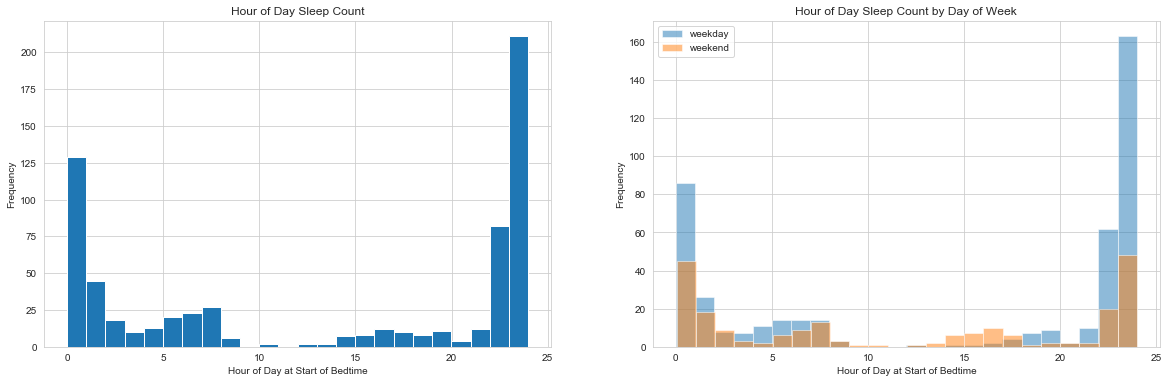

In [587]:
start_df = (sleep_df['start_time'].dt.hour + sleep_df['start_time'].dt.minute/60 + sleep_df['start_time'].dt.second/3600)

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(121)
ax.set_xlabel('Hour of Day at Start of Bedtime')
ax.set_ylabel('Frequency')
ax.set_title('Hour of Day Sleep Count')
ax.hist(start_df, bins=24)

day_week_start_df = pd.concat([start_df, sleep_df['end_time'].dt.dayofweek], axis=1)
day_week_start_df.columns = ['start_hour', 'dayofweek']
day_week_start_df.at[day_week_start_df['dayofweek'] < 5, 'dayofweek'] = 'weekday'
day_week_start_df.at[((day_week_start_df['dayofweek'] == 5) | (day_week_start_df['dayofweek'] == 6)), 'dayofweek'] = 'weekend'
day_week_df = day_week_start_df.iloc[:,1]

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Hour of Day at Start of Bedtime')
ax2.set_ylabel('Frequency')
ax2.set_title('Hour of Day Sleep Count by Day of Week')
ax2.hist(day_week_start_df[day_week_start_df['dayofweek'] == 'weekday'].iloc[:,0], bins=24, alpha=0.5, label='weekday')
ax2.hist(day_week_start_df[day_week_start_df['dayofweek'] == 'weekend'].iloc[:,0], bins=24, alpha=0.5, label='weekend')
ax2.legend()

#### Hour Upon Waking, Weekday vs Weekend

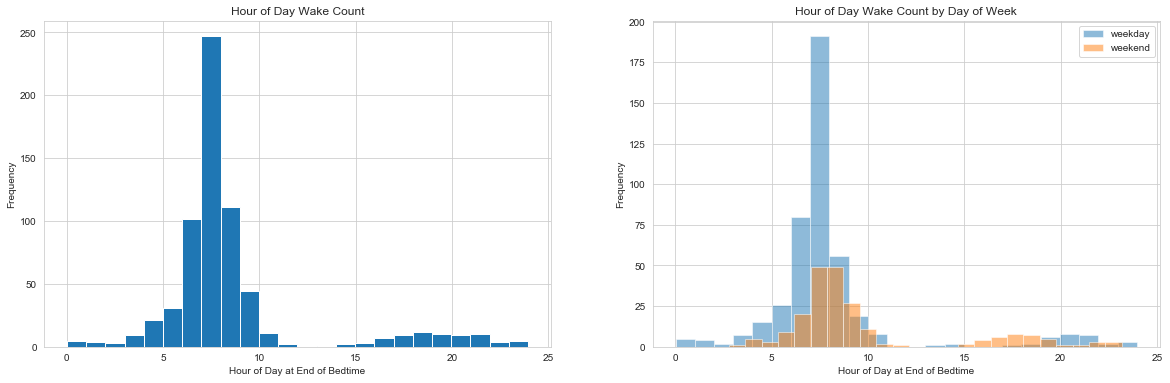

In [588]:
end_df = (sleep_df['end_time'].dt.hour + sleep_df['end_time'].dt.minute/60 + sleep_df['end_time'].dt.second/3600)

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(121)
ax.set_xlabel('Hour of Day at End of Bedtime')
ax.set_ylabel('Frequency')
ax.set_title('Hour of Day Wake Count')
ax.hist(end_df, bins=24)

day_week_end_df = pd.concat([end_df, day_week_df], axis=1)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Hour of Day at End of Bedtime')
ax2.set_ylabel('Frequency')
ax2.set_title('Hour of Day Wake Count by Day of Week')
ax2.hist(day_week_end_df[day_week_end_df['dayofweek'] == 'weekday'].iloc[:,0], bins=24, alpha=0.5, label='weekday')
ax2.hist(day_week_end_df[day_week_end_df['dayofweek'] == 'weekend'].iloc[:,0], bins=24, alpha=0.5, label='weekend')
ax2.legend()

#### Sleep Duration, Weekday vs Weekend

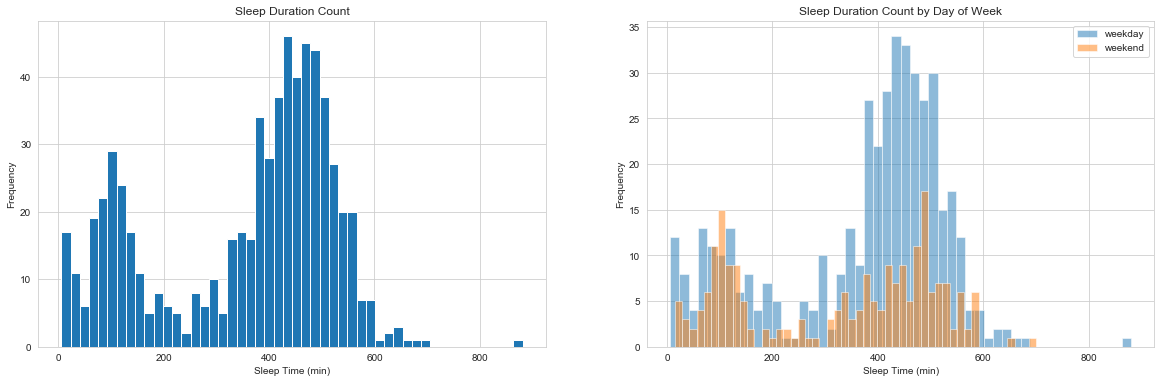

In [607]:
duration_df = (end_df - start_df) * 60
duration_df[duration_df<0] = duration_df[duration_df<0] + 1440

fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(121)
ax.set_xlabel('Sleep Time (min)')
ax.set_ylabel('Frequency')
ax.set_title('Sleep Duration Count')
ax.hist(duration_df, bins=50)

day_week_duration_df = pd.concat([duration_df, day_week_df], axis=1)

ax2 = fig.add_subplot(122)
ax2.set_xlabel('Sleep Time (min)')
ax2.set_ylabel('Frequency')
ax2.set_title('Sleep Duration Count by Day of Week')
ax2.hist(day_week_duration_df[day_week_duration_df['dayofweek'] == 'weekday'].iloc[:,0], bins=50, alpha=0.5, label='weekday')
ax2.hist(day_week_duration_df[day_week_duration_df['dayofweek'] == 'weekend'].iloc[:,0], bins=50, alpha=0.5, label='weekend')
ax2.legend()

#### Sleep Duration by Date with Efficiency

In [617]:
quality_df = sleep_df['efficiency'].copy()

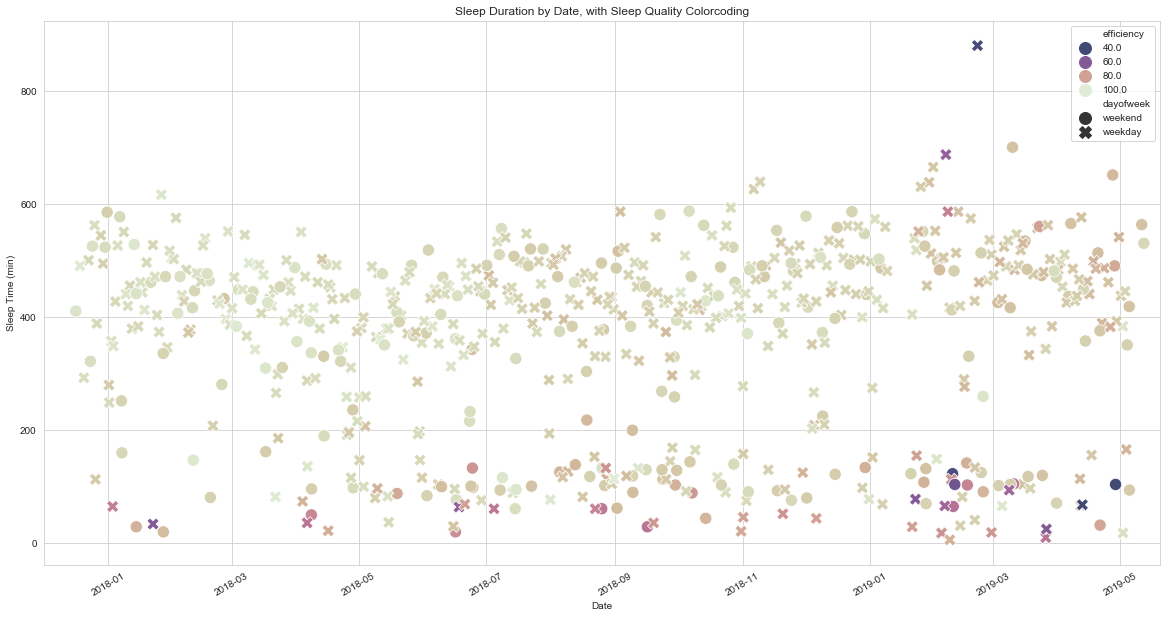

In [618]:
fig = plt.figure(figsize=(20, 10))
palette = sns.cubehelix_palette(4, start=2, rot=1, dark=.3, light=.9, as_cmap=True, reverse=True)
ax = sns.scatterplot(data=sleep_df, x='end_time',y=duration_df, hue=quality_df[quality_df!=0], palette=palette, style=day_week_df, s=150)
ax = ax.set(xlabel='Date', ylabel='Sleep Time (min)', xlim=('2017-12-01', '2019-05-20'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Sleep Duration by Date, with Sleep Quality Colorcoding')
plt.show(ax)

#### Sleep Time vs Sleep Efficiency linear regression

In [621]:
dur_qual_df = pd.concat([duration_df, quality_df], axis=1)
dur_qual_df = dur_qual_df[dur_qual_df['efficiency']!=0]

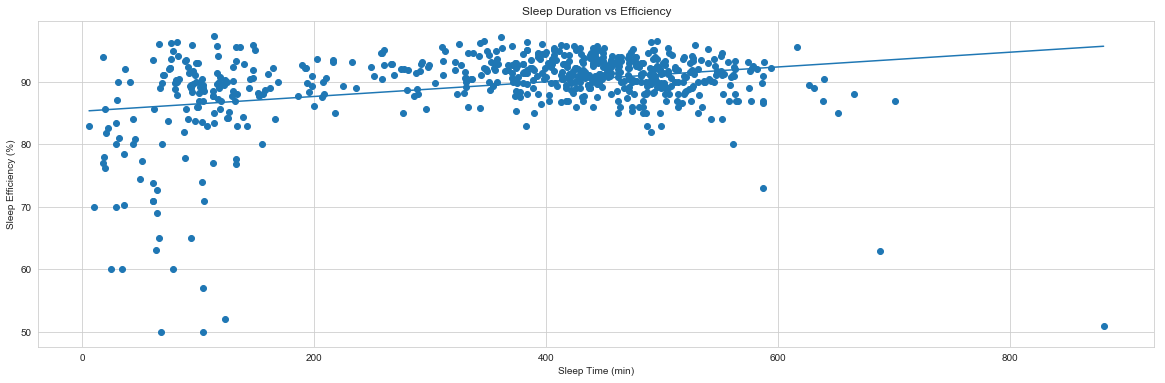

In [631]:
fig = plt.figure(figsize=(20, 6))
ax = fig.add_subplot(111)
ax.set_xlabel('Sleep Time (min)')
ax.set_ylabel('Sleep Efficiency (%)')
ax.set_title('Sleep Duration vs Efficiency')
ax.scatter(dur_qual_df.iloc[:,0], dur_qual_df.iloc[:,1])

plt.plot(np.unique(dur_qual_df.iloc[:,0]), np.poly1d(np.polyfit(dur_qual_df.iloc[:,0], dur_qual_df.iloc[:,1], 1))(np.unique(dur_qual_df.iloc[:,0])))

#### Sleep and Wake Hour by Time Zone

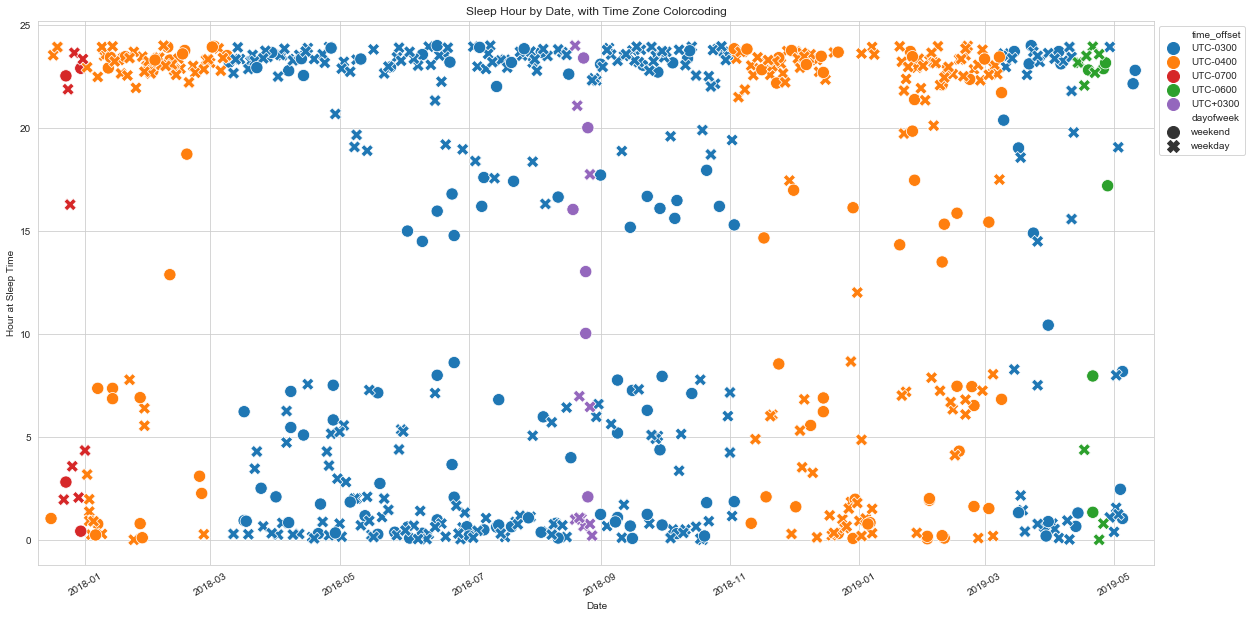

In [644]:
sleep_date_df = pd.concat([start_df, sleep_df['start_time'].dt.date], axis=1)
sleep_date_df.columns = ['start_hour', 'start_date']

fig = plt.figure(figsize=(20, 10))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0600":"C2", "UTC-0700":"C3", "UTC+0300":"C4"}
ax = sns.scatterplot(data=sleep_date_df, x='start_date',y='start_hour', hue=sleep_df['time_offset'], palette=palette, style=day_week_df, s=150)
ax = ax.set(xlabel='Date', ylabel='Hour at Sleep Time', xlim=('2017-12-10', '2019-05-20'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Sleep Hour by Date, with Time Zone Colorcoding')
plt.show(ax)

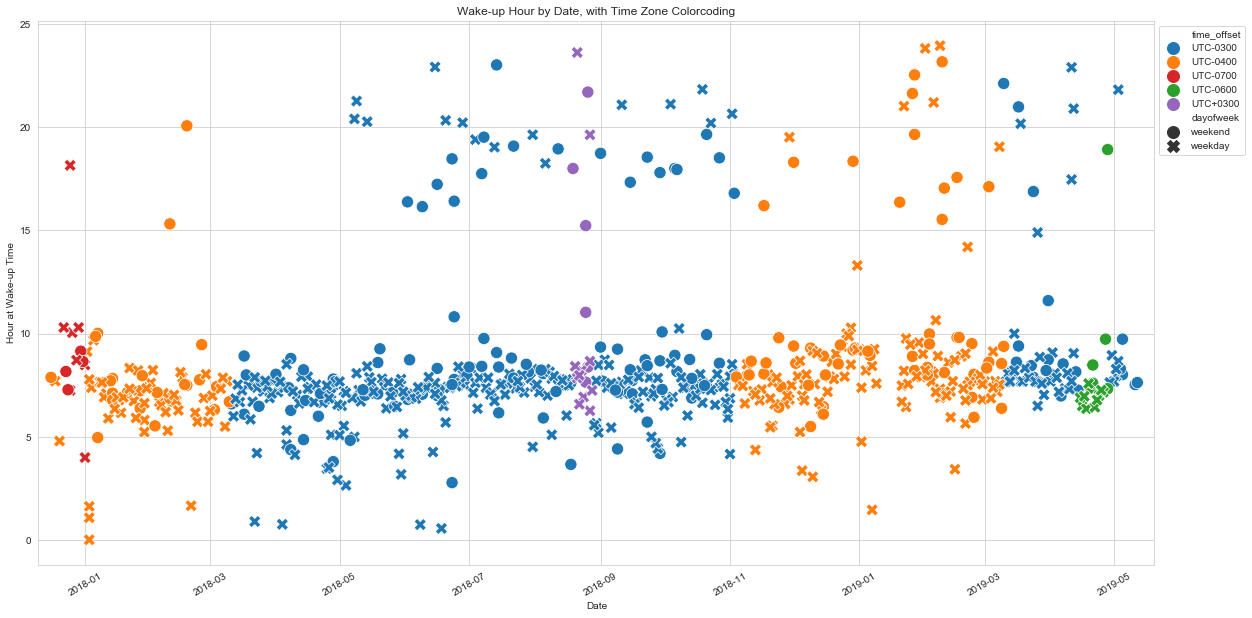

In [641]:
wake_date_df = pd.concat([end_df, sleep_df['end_time'].dt.date], axis=1)
wake_date_df.columns = ['end_hour', 'end_date']

fig = plt.figure(figsize=(20, 10))
palette = {"UTC-0300":"C0","UTC-0400":"C1","UTC-0600":"C2", "UTC-0700":"C3", "UTC+0300":"C4"}
ax = sns.scatterplot(data=wake_date_df, x='end_date',y='end_hour', hue=sleep_df['time_offset'], palette=palette, style=day_week_df, s=150)
ax = ax.set(xlabel='Date', ylabel='Hour at Wake-up Time', xlim=('2017-12-10', '2019-05-20'))
plt.xticks(rotation=30)
plt.legend(bbox_to_anchor=(1, 1), markerscale=2)
plt.title('Wake-up Hour by Date, with Time Zone Colorcoding')
plt.show(ax)

### Observations

- Beginning of sleep time is normally distributed with right skew, the peak occuring around 9PM, for both weekday and weekend
- Wake-up time is normally distributed with left skew, with peak around 4-5AM, for both weekday and weekend


- Majority of sleep durations occur between 350mins and 550mins in a symmetrical normal distribution, with peak around 450mins (7.5 hours). Outside of this distribution at durations of 300min and less seem to be outliers to a normal night's sleep, which may include naps.
- Full night's rest within majority of sleep durations start mostly between 8-10PM
- Lower quality (efficiency) sleep (below 80%) occurs at lower sleep time durations less than about 150mins
- Less sleep durations occurred more frequently after mid-March 2018 after Daylight Savings


- During 12 days of datapoints within UTC-0700 timezone, the person sleep had some irregularity possible due to partying. After going back to UTC-0400 it took a few days to fix and go back to their normal sleep schedule.

____

## Sleep_df2

In [648]:
sleep_df1 = pd.read_csv('./sleep.csv')
sleep_df2 = pd.read_csv('./sleep_data.csv')

In [655]:
sleep_df1.drop(['Unnamed: 0',
               'com.samsung.health.sleep.pkg_name', 'com.samsung.health.sleep.custom',
               'extra_data', 'com.samsung.health.sleep.comment'], axis=1, inplace=True)
sleep_df1 = sleep_df1.rename(columns={'com.samsung.health.sleep.start_time': 'start_time', 
                                    'com.samsung.health.sleep.end_time': 'end_time',
                                    'com.samsung.health.sleep.create_time': 'create_time',
                                    'com.samsung.health.sleep.update_time': 'update_time',
                                    'com.samsung.health.sleep.time_offset': 'time_offset',
                                    'com.samsung.health.sleep.deviceuuid': 'deviceuuid',
                                      'com.samsung.health.sleep.datauuid': 'sleep_uuid'})

In [657]:
sleep_df1['has_sleep_data'].fillna(0, inplace=True)
sleep_df1['start_time'] = pd.to_datetime(sleep_df1['start_time'], unit='ms')
sleep_df1['end_time'] = pd.to_datetime(sleep_df1['end_time'], unit='ms')
sleep_df1['create_time'] = pd.to_datetime(sleep_df1['create_time'], unit='ms')
sleep_df1['update_time'] = pd.to_datetime(sleep_df1['update_time'], unit='ms')
cols = sleep_df1.columns.tolist()
cols = ['deviceuuid', 'time_offset', 'create_time', 'start_time', 'end_time', 'update_time', 'efficiency', 'has_sleep_data',
        'original_bed_time', 'original_wake_up_time', 'original_efficiency', 'quality', 'sleep_uuid']
sleep_df1 = sleep_df1[cols]

In [659]:
sleep_df2.nunique()

Unnamed: 0      652
start_time      652
pkg_name          1
update_time     652
create_time     652
time_offset       5
datauuid        652
sleep_status    652
sleep_uuid      652
comment           0
json_version      1
deviceuuid        1
dtype: int64

In [660]:
sleep_df2.drop(['Unnamed: 0', 'pkg_name', 'datauuid', 'sleep_status', 'comment', 'json_version'], axis=1, inplace=True)

In [661]:
sleep_df2

start_time              update_time  \
0    2018-11-26 03:07:00.000  2018-11-26 11:36:33.269   
1    2017-12-29 09:03:00.000  2017-12-29 17:33:04.291   
2    2018-08-15 02:40:00.000  2018-08-15 10:36:24.250   
3    2018-11-05 03:21:00.000  2018-11-05 11:31:53.256   
4    2018-09-29 19:05:00.000  2018-09-29 20:48:54.263   
5    2018-01-30 02:43:00.000  2018-01-30 11:36:10.281   
6    2018-10-02 02:25:00.000  2018-10-02 09:50:03.797   
7    2019-03-19 04:26:00.000  2019-03-19 10:47:41.933   
8    2018-02-13 02:47:00.000  2018-02-13 10:46:41.916   
9    2018-06-06 02:21:00.000  2018-06-06 09:52:10.003   
10   2018-09-06 08:37:00.000  2018-09-06 10:36:23.396   
11   2018-12-20 04:20:00.000  2018-12-20 11:49:43.469   
12   2018-10-08 06:21:00.000  2018-10-08 13:16:26.044   
13   2018-07-22 02:10:00.000  2018-07-22 11:05:57.273   
14   2018-12-18 05:11:00.000  2018-12-18 12:10:03.328   
15   2018-12-22 04:18:00.000  2018-12-22 12:32:43.978   
16   2018-03-20 01:51:00.000  2018-03-20 09:05:47.281   
17   2018-12-27 05:31:00.000  2018-12-27 14:08:01.269   
18   2018-04-16 10:33:00.000  2018-04-16 11:09:42.265   
19   2018-01-06 04:14:00.000  2018-01-06 13:53:19.428   
20   2018-12-30 05:58:00.000  2018-12-30 13:20:12.623   
21   2019-01-03 03:36:00.000  2019-01-03 13:17:10.207   
22   2018-11-01 07:14:00.000  2018-11-01 10:06:40.279   
23   2019-02-09 17:29:00.000  2019-02-09 19:48:04.280   
24   2018-10-04 22:35:00.000  2018-10-05 00:22:23.256   
25   2018-07-10 01:51:00.000  2018-07-10 10:54:13.588   
26   2018-11-11 04:48:00.000  2018-11-11 12:54:36.260   
27   2018-10-27 02:50:00.000  2018-10-27 11:35:26.474   
28   2018-02-28 03:17:00.000  2018-02-28 09:46:27.727   
29   2018-02-03 02:45:00.000  2018-02-03 09:33:13.766   
..                       ...                      ...   
622  2019-02-24 10:31:00.000  2019-02-24 12:02:33.835   
623  2019-02-28 02:18:00.000  2019-02-28 10:55:52.949   
624  2019-03-30 03:11:00.000  2019-03-30 11:13:09.950   
625  2018-06-24 17:46:00.000  2018-06-24 19:40:05.238   
626  2018-05-12 02:20:00.000  2018-05-12 10:19:10.197   
627  2018-09-19 02:56:00.000  2018-09-19 09:26:47.295   
628  2019-02-20 10:48:00.000  2019-02-20 13:03:53.062   
629  2018-01-07 11:21:00.000  2018-01-07 14:15:59.747   
630  2018-02-17 03:35:00.000  2018-02-17 11:36:30.186   
631  2018-08-18 01:36:00.000  2018-08-18 06:54:51.273   
632  2019-03-09 10:49:00.000  2019-03-09 12:34:53.231   
633  2018-12-01 03:45:00.000  2018-12-01 13:24:31.429   
634  2018-04-26 03:13:00.000  2018-04-26 06:31:50.563   
635  2018-07-04 02:56:00.000  2018-07-04 10:51:30.264   
636  2018-10-21 04:48:00.000  2018-10-21 12:59:04.275   
637  2019-03-09 03:26:00.000  2019-03-09 10:31:45.089   
638  2018-06-24 11:36:00.000  2018-06-24 14:04:11.270   
639  2018-08-09 03:15:00.000  2018-08-09 08:20:36.264   
640  2019-04-21 07:20:00.000  2019-04-21 13:39:26.819   
641  2018-01-22 02:32:00.000  2018-01-22 11:23:49.056   
642  2018-03-11 02:11:00.000  2018-03-11 09:37:49.588   
643  2019-02-27 03:03:00.000  2019-02-27 12:11:44.398   
644  2019-04-11 18:34:00.000  2019-04-11 20:45:03.314   
645  2018-11-21 02:34:00.000  2018-11-21 09:33:21.963   
646  2018-05-16 03:14:00.000  2018-05-16 10:41:50.449   
647  2018-05-28 03:13:00.000  2018-05-28 09:42:10.300   
648  2019-02-04 11:52:00.000  2019-02-04 12:10:39.355   
649  2018-09-10 02:15:00.000  2018-09-10 10:33:21.849   
650  2019-05-11 01:08:00.000  2019-05-11 10:32:36.466   
651  2019-05-12 01:47:00.000  2019-05-12 10:39:45.627   

                 create_time time_offset  \
0    2018-11-26 11:36:33.269    UTC-0400   
1    2017-12-29 17:33:04.291    UTC-0700   
2    2018-08-15 10:36:24.250    UTC-0300   
3    2018-11-05 11:31:53.256    UTC-0400   
4    2018-09-29 20:48:54.263    UTC-0300   
5    2018-01-30 11:36:10.281    UTC-0400   
6    2018-10-02 09:50:03.797    UTC-0300   
7    2019-03-19 10:47:41.933    UTC-0300   
8    2018-02-13 10:46:41.916    UTC-0400   
9    2018-06-06 09:52:10.003    UTC-0300   

In [663]:
sleep_df1.merge(sleep_df2, how='inner', left_on='sleep_uuid', right_on='sleep_uuid')

deviceuuid_x time_offset_x           create_time_x        start_time_x  \
0     F/D7+hL5E5      UTC-0300 2018-09-02 10:42:38.245 2018-09-02 02:05:00   
1     F/D7+hL5E5      UTC-0400 2018-12-02 12:36:17.370 2018-12-02 05:36:00   
2     F/D7+hL5E5      UTC-0300 2018-07-04 22:38:50.297 2018-07-04 21:23:00   
3     F/D7+hL5E5      UTC-0300 2018-10-17 10:38:34.989 2018-10-17 01:32:00   
4     F/D7+hL5E5      UTC-0300 2018-05-02 09:31:11.680 2018-05-02 03:09:00   
5     F/D7+hL5E5      UTC-0300 2018-08-15 10:36:24.268 2018-08-15 02:40:00   
6     F/D7+hL5E5      UTC-0300 2018-04-27 08:08:03.130 2018-04-27 02:55:00   
7     F/D7+hL5E5      UTC-0300 2018-05-04 05:54:04.305 2018-05-04 02:12:00   
8     F/D7+hL5E5      UTC-0400 2018-01-29 10:03:35.404 2018-01-29 09:32:00   
9     F/D7+hL5E5      UTC-0400 2018-01-14 11:57:55.709 2018-01-14 11:21:00   
10    F/D7+hL5E5      UTC-0300 2018-05-09 11:05:51.310 2018-05-09 05:00:00   
11    F/D7+hL5E5      UTC-0300 2018-09-22 11:45:11.115 2018-09-22 02:02:00   
12    F/D7+hL5E5      UTC-0300 2018-07-02 11:26:33.451 2018-07-02 03:26:00   
13    F/D7+hL5E5      UTC-0300 2018-05-19 11:51:09.334 2018-05-19 10:08:00   
14    F/D7+hL5E5      UTC-0300 2018-06-19 09:31:29.041 2018-06-19 01:14:00   
15    F/D7+hL5E5      UTC-0300 2018-07-23 10:36:11.282 2018-07-23 03:52:00   
16    F/D7+hL5E5      UTC-0400 2018-12-24 13:23:36.079 2018-12-24 05:00:00   
17    F/D7+hL5E5      UTC-0400 2018-11-24 14:03:18.342 2018-11-24 12:32:00   
18    F/D7+hL5E5      UTC-0300 2018-05-30 11:02:45.269 2018-05-30 08:21:00   
19    F/D7+hL5E5      UTC-0300 2018-04-04 10:27:57.286 2018-04-04 03:49:00   
20    F/D7+hL5E5      UTC-0400 2018-12-15 10:43:13.262 2018-12-15 10:13:00   
21    F/D7+hL5E5      UTC-0300 2018-05-21 10:50:16.102 2018-05-21 04:06:00   
22    F/D7+hL5E5      UTC-0300 2018-06-24 19:40:05.277 2018-06-24 17:46:00   
23    F/D7+hL5E5      UTC-0700 2018-01-01 15:40:05.119 2018-01-01 11:20:00   
24    F/D7+hL5E5      UTC-0300 2018-03-21 09:42:24.842 2018-03-21 02:13:00   
25    F/D7+hL5E5      UTC-0400 2018-11-29 10:51:02.352 2018-11-29 03:43:00   
26    F/D7+hL5E5      UTC-0400 2018-02-10 19:33:51.280 2018-02-10 16:52:00   
27    F/D7+hL5E5      UTC-0400 2018-12-14 10:20:21.420 2018-12-14 02:43:00   
28    F/D7+hL5E5      UTC-0400 2018-01-11 11:07:35.890 2018-01-11 03:30:00   
29    F/D7+hL5E5      UTC-0300 2018-03-22 04:09:06.294 2018-03-22 02:32:00   
..           ...           ...                     ...                 ...   
622   F/D7+hL5E5      UTC-0400 2019-01-25 13:36:07.832 2019-01-25 02:57:00   
623   F/D7+hL5E5      UTC-0300 2019-03-27 11:53:56.826 2019-03-27 02:29:00   
624   F/D7+hL5E5      UTC-0600 2019-04-21 13:39:26.858 2019-04-21 07:20:00   
625   F/D7+hL5E5      UTC-0600 2019-04-26 13:10:46.637 2019-04-26 06:47:00   
626   F/D7+hL5E5      UTC-0400 2019-03-08 23:22:40.288 2019-03-08 21:29:00   
627   F/D7+hL5E5      UTC-0400 2019-02-24 10:13:31.274 2019-02-24 05:37:00   
628   F/D7+hL5E5      UTC-0400 2019-01-03 13:17:10.233 2019-01-03 03:36:00   
629   F/D7+hL5E5      UTC-0600 2019-04-29 01:14:08.308 2019-04-28 23:11:00   
630   F/D7+hL5E5      UTC-0400 2019-02-06 14:59:23.604 2019-02-06 03:11:00   
631   F/D7+hL5E5      UTC-0300 2019-05-04 00:54:00.953 2019-05-03 22:03:00   
632   F/D7+hL5E5      UTC-0300 2019-03-30 11:13:09.983 2019-03-30 03:11:00   
633   F/D7+hL5E5      UTC-0400 2019-02-01 12:29:28.345 2019-02-01 03:00:00   
634   F/D7+hL5E5      UTC-0400 2019-02-20 13:03:53.085 2019-02-20 10:48:00   
635   F/D7+hL5E5      UTC-0400 2019-01-28 12:05:47.020 2019-01-28 04:20:00   
636   F/D7+hL5E5      UTC-0300 2019-03-15 11:14:58.323 2019-03-15 02:22:00   
637   F/D7+hL5E5      UTC-0400 2019-03-09 10:31:45.115 2019-03-09 03:26:00   
638   F/D7+hL5E5      UTC-0600 2019-04-23 12:49:18.498 2019-04-23 04:40:00   
639   F/D7+hL5E5      UTC-0400 2019-02-11 11:00:14.751 2019-02-11 02:26:00   
640   F/D7+hL5E5      UTC-0600 2019-04-19 13:51:00.320 2019-04-19 05:29:00   
641   F/D7+hL5E5      UTC-

### Observations
Sleep_data.csv contains the exact same data as sleep.csv with properly formatted time and less columns of information.

_____

## Step Count

In [665]:
step_count_df

create_time   distance time_offset  count  \
0     2019-04-07 15:43:12.282  64.970000    UTC-0300    102   
1     2019-04-07 17:33:31.553  17.360000    UTC-0300     27   
2     2019-04-07 15:35:00.357  78.550000    UTC-0300    102   
3     2019-04-06 18:15:01.224  25.970000    UTC-0300     36   
4     2019-04-07 15:07:14.262  75.750000    UTC-0300     99   
5     2019-04-07 14:44:31.423  42.320000    UTC-0300     60   
6     2019-04-07 15:42:06.408  77.120000    UTC-0300    102   
7     2019-04-07 12:43:31.428  75.130000    UTC-0300     95   
8     2019-04-07 16:38:12.454  69.019940    UTC-0300     88   
9     2019-04-06 10:55:01.223  12.640000    UTC-0300     17   
10    2019-04-06 18:13:17.461  28.560000    UTC-0300     37   
11    2019-04-07 12:55:00.308  60.190000    UTC-0300     82   
12    2019-04-07 17:33:31.563   3.400000    UTC-0300      5   
13    2019-04-07 17:45:33.563  32.720000    UTC-0300     48   
14    2019-04-06 21:35:01.240   8.230000    UTC-0300     12   
15    2019-04-07 15:48:46.198  74.539970    UTC-0300    101   
16    2019-04-06 16:51:21.201   6.510000    UTC-0300      8   
17    2019-04-06 20:38:12.347  26.690004    UTC-0300     33   
18    2019-04-07 16:11:21.414  30.800000    UTC-0300     47   
19    2019-04-06 10:55:01.199   7.680000    UTC-0300     15   
20    2019-04-07 14:00:16.268  76.760000    UTC-0300    103   
21    2019-04-07 15:39:06.401  78.030000    UTC-0300    101   
22    2019-04-07 15:20:33.413  20.270000    UTC-0300     32   
23    2019-04-06 20:31:42.431   9.500000    UTC-0300     13   
24    2019-04-07 15:20:06.327  57.500000    UTC-0300     69   
25    2019-04-07 15:13:39.467  61.120000    UTC-0300     96   
26    2019-04-06 17:52:53.633   4.470000    UTC-0300      7   
27    2019-04-07 03:55:01.188  10.890000    UTC-0300     16   
28    2019-04-06 18:09:10.905  10.330000    UTC-0300     14   
29    2019-04-06 15:25:56.483  41.210000    UTC-0300     63   
...                       ...        ...         ...    ...   
9063  2019-05-12 01:55:00.461  22.360000    UTC-0300     28   
9064  2019-05-12 01:55:00.463  19.360000    UTC-0300     26   
9065  2019-05-12 01:55:00.464  18.990000    UTC-0300     24   
9066  2019-05-12 01:55:00.576  10.250000    UTC-0300     13   
9067  2019-05-12 05:15:01.570  11.690000    UTC-0300     20   
9068  2019-05-12 05:15:01.589   4.210000    UTC-0300      6   
9069  2019-05-12 10:44:12.735  31.520000    UTC-0300     46   
9070  2019-05-12 10:47:48.388  32.180000    UTC-0300     45   
9071  2019-05-12 12:55:00.380  54.380000    UTC-0300     74   
9072  2019-05-12 12:55:00.382  44.720000    UTC-0300     65   
9073  2019-05-12 12:55:00.384  29.380000    UTC-0300     45   
9074  2019-05-12 12:55:00.873  30.500000    UTC-0300     45   
9075  2019-05-12 12:55:00.876  11.320000    UTC-0300     15   
9076  2019-05-12 13:15:00.393  37.970000    UTC-0300     53   
9077  2019-05-12 13:15:00.395   0.620000    UTC-0300      1   
9078  2019-05-12 13:15:00.413  12.530000    UTC-0300     19   
9079  2019-05-12 13:15:00.415  12.990000    UTC-0300     19   
9080  2019-05-12 13:15:00.433  16.060000    UTC-0300     25   
9081  2019-05-12 13:35:00.255  11.120000    UTC-0300     16   
9082  2019-05-12 13:35:00.378  12.930000    UTC-0300     19   
9083  2019-05-12 13:35:00.396  30.820000    UTC-0300     42   
9084  2019-05-12 13:35:00.398  10.570000    UTC-0300     17   
9085  2019-05-12 13:50:14.427  22.370000    UTC-0300     27   
9086  2019-05-12 13:54:34.340  10.220000    UTC-0300     17   
9087  2019-05-12 13:54:34.342  15.960000    UTC-0300     29   
9088  2019-05-12 13:54:34.355  55.820000    UTC-0300     78   
9089  2019-05-12 13:54:34.357  28.020000    UTC-0300     47   
9090  2019-05-12 13:54:34.358  38.940000    UTC-0300     56   
9091  2019-05-12 14:27:59.693   4.570000    UTC-0300      6   
9092  2019-05-12 14:28:00.221  17.059998    UTC-0300     23   

                     end_time     speed  deviceuuid               start_time  \
0     2019-04-07 15:35:59.999  

In [666]:
step_count_df.nunique()

create_time             9093
distance                6188
time_offset                2
count                    155
end_time                9065
speed                   1916
deviceuuid                 3
start_time              6243
update_time             9093
calorie                 1516
sample_position_type       1
dtype: int64

In [667]:
step_count_df.drop(['Unnamed: 0', 'custom', 'pkg_name', 'datauuid'], axis=1, inplace=True)

KeyError: "['Unnamed: 0' 'custom' 'pkg_name' 'datauuid'] not found in axis"

In [668]:
step_count_df[~step_count_df['sample_position_type'].isna()]

create_time  distance time_offset  count  \
0     2019-04-07 15:43:12.282    64.970    UTC-0300    102   
1     2019-04-07 17:33:31.553    17.360    UTC-0300     27   
3     2019-04-06 18:15:01.224    25.970    UTC-0300     36   
9     2019-04-06 10:55:01.223    12.640    UTC-0300     17   
12    2019-04-07 17:33:31.563     3.400    UTC-0300      5   
13    2019-04-07 17:45:33.563    32.720    UTC-0300     48   
14    2019-04-06 21:35:01.240     8.230    UTC-0300     12   
18    2019-04-07 16:11:21.414    30.800    UTC-0300     47   
19    2019-04-06 10:55:01.199     7.680    UTC-0300     15   
22    2019-04-07 15:20:33.413    20.270    UTC-0300     32   
25    2019-04-07 15:13:39.467    61.120    UTC-0300     96   
26    2019-04-06 17:52:53.633     4.470    UTC-0300      7   
27    2019-04-07 03:55:01.188    10.890    UTC-0300     16   
28    2019-04-06 18:09:10.905    10.330    UTC-0300     14   
29    2019-04-06 15:25:56.483    41.210    UTC-0300     63   
35    2019-04-07 14:17:39.444    63.700    UTC-0300    102   
36    2019-04-07 12:42:26.327    72.410    UTC-0300    102   
38    2019-04-07 15:13:39.471    40.890    UTC-0300     63   
39    2019-04-07 13:55:01.227    52.830    UTC-0300     97   
40    2019-04-07 16:45:22.613    59.030    UTC-0300     91   
46    2019-04-07 14:20:00.198    54.517    UTC-0300     94   
48    2019-04-07 16:45:22.603    48.310    UTC-0300     78   
50    2019-04-07 14:35:01.224    38.650    UTC-0300     69   
52    2019-04-06 11:07:11.694    10.420    UTC-0300     18   
53    2019-04-06 18:35:01.218    26.920    UTC-0300     39   
54    2019-04-06 20:31:20.535    40.910    UTC-0300     65   
57    2019-04-07 15:49:54.486    48.329    UTC-0300     76   
58    2019-04-07 15:49:54.477    29.600    UTC-0300     41   
60    2019-04-07 17:33:31.577    30.740    UTC-0300     51   
62    2019-04-07 15:13:39.475    39.300    UTC-0300     70   
...                       ...       ...         ...    ...   
9061  2019-05-12 01:55:00.457    33.940    UTC-0300     41   
9062  2019-05-12 01:55:00.459    17.000    UTC-0300     23   
9063  2019-05-12 01:55:00.461    22.360    UTC-0300     28   
9064  2019-05-12 01:55:00.463    19.360    UTC-0300     26   
9065  2019-05-12 01:55:00.464    18.990    UTC-0300     24   
9066  2019-05-12 01:55:00.576    10.250    UTC-0300     13   
9067  2019-05-12 05:15:01.570    11.690    UTC-0300     20   
9068  2019-05-12 05:15:01.589     4.210    UTC-0300      6   
9069  2019-05-12 10:44:12.735    31.520    UTC-0300     46   
9070  2019-05-12 10:47:48.388    32.180    UTC-0300     45   
9071  2019-05-12 12:55:00.380    54.380    UTC-0300     74   
9072  2019-05-12 12:55:00.382    44.720    UTC-0300     65   
9073  2019-05-12 12:55:00.384    29.380    UTC-0300     45   
9074  2019-05-12 12:55:00.873    30.500    UTC-0300     45   
9075  2019-05-12 12:55:00.876    11.320    UTC-0300     15   
9076  2019-05-12 13:15:00.393    37.970    UTC-0300     53   
9077  2019-05-12 13:15:00.395     0.620    UTC-0300      1   
9078  2019-05-12 13:15:00.413    12.530    UTC-0300     19   
9079  2019-05-12 13:15:00.415    12.990    UTC-0300     19   
9080  2019-05-12 13:15:00.433    16.060    UTC-0300     25   
9081  2019-05-12 13:35:00.255    11.120    UTC-0300     16   
9082  2019-05-12 13:35:00.378    12.930    UTC-0300     19   
9083  2019-05-12 13:35:00.396    30.820    UTC-0300     42   
9084  2019-05-12 13:35:00.398    10.570    UTC-0300     17   
9085  2019-05-12 13:50:14.427    22.370    UTC-0300     27   
9086  2019-05-12 13:54:34.340    10.220    UTC-0300     17   
9087  2019-05-12 13:54:34.342    15.960    UTC-0300     29   
9088  2019-05-12 13:54:34.355    55.820    UTC-0300     78   
9089  2019-05-12 13:54:34.357    28.020    UTC-0300     47   
9090  2019-05-12 13:54:34.358    38.940    UTC-0300     56   

                     end_time     speed  deviceuuid               start_time  \
0     2019-04-07 15:35:59.999  1.083333  F/D7+hL5E5  2019-04-07 15:35:00.000   
1     2019-04

### Observations

From Samsung health constants, sample_position_type is 230002 when the device is on the wrist. 

This value appears when deviceuuid is F/D7+hL5E5, therefore it is certain that this device is a smartwatch.

____

## Step_daily

In [64]:
step_daily_df

Unnamed: 0              create_time    distance  count  source_type  \
0              0  2019-05-10 11:52:40.347   2642.6000   3341            0   
1              1  2019-05-10 11:52:40.348    824.4800   1116            0   
2              2  2019-05-10 11:52:40.349    800.8800   1057            0   
3              3  2019-05-10 11:52:40.350   4760.4100   6411            0   
4              4  2019-05-10 11:52:40.351   1546.4800   2034            0   
5              5  2019-05-10 11:52:40.351   5300.3800   6876            0   
6              6  2019-05-10 11:52:40.352   2730.5100   3633            0   
7              7  2019-05-10 11:52:40.352   1373.6799   1789            0   
8              8  2019-05-10 11:52:40.353   7621.2700   9314            0   
9              9  2019-05-10 11:52:40.353   2538.4400   3322            0   
10            10  2019-05-10 11:52:40.354   2791.1300   3617            0   
11            11  2019-05-10 11:52:40.354  10545.6200  14009            0   
12            12  2019-05-10 11:52:40.355  16104.6300  22022            0   
13            13  2019-05-10 11:52:40.356   8402.1200  11468            0   
14            14  2019-05-10 11:52:40.364   4612.8700   6200            0   
15            15  2019-05-10 11:52:40.365   8386.1800  11136            0   
16            16  2019-05-10 11:52:40.365    244.9600    328            0   
17            17  2019-05-10 11:52:40.368   4205.2500   5354            0   
18            18  2019-05-10 11:52:40.372   1467.2300   1792            0   
19            19  2019-05-10 11:52:40.373   3130.5200   3755            0   
20            20  2019-05-10 11:52:40.373   6562.1200   8046            0   
21            21  2019-05-10 11:52:40.374   3601.5400   4367            0   
22            22  2019-05-10 11:52:40.375   2181.1800   2605            0   
23            23  2019-05-10 11:52:40.376   1075.2101   1299            0   
24            24  2019-05-10 11:52:40.376   2687.2400   3287            0   
25            25  2019-05-10 11:52:40.377   3570.8000   4273            0   
26            26  2019-05-10 11:52:40.378   3579.9200   4360            0   
27            27  2019-05-10 11:52:40.379   5607.3200   6929            0   
28            28  2019-05-10 11:52:40.380   5044.7100   5924            0   
29            29  2019-05-10 11:52:40.380   6395.4500   7943            0   
...          ...                      ...         ...    ...          ...   
2607        2607  2019-05-10 11:52:41.553   7542.5370  11270           13   
2608        2608  2019-05-10 11:52:41.554   3530.0300   4715           13   
2609        2609  2019-05-10 11:52:41.554   9490.0190  14675           13   
2610        2610  2019-05-10 11:52:41.554   4963.3420   7313           13   
2611        2611  2019-05-10 11:52:41.554   1989.7950   2893           13   
2612        2612  2019-05-10 11:52:41.555   3207.0160   4817           13   
2613        2613  2019-05-10 11:52:41.555   5356.8510   8200           13   
2614        2614  2019-05-10 11:52:41.555   3142.7190   4902           13   
2615        2615  2019-05-10 11:52:41.555   3082.5100   3965           13   
2616        2616  2019-05-10 11:52:41.556   7619.4700   9979           13   
2617        2617  2019-05-10 11:52:41.556   8210.4980  11531           13   
2618        2618  2019-05-10 11:52:41.556   8352.3980  11743           13   
2619        2619  2019-05-10 11:52:41.557   9018.7860  12551           13   
2620        2620  2019-05-10 11:52:41.557  12418.0410  17839           13   
2621        2621  2019-05-10 11:52:41.557   6810.4720   9163           13   
2622        2622  2019-05-10 11:52:41.557   8557.4410  11185           13   
2623        2623  2019-05-10 11:52:41.558   3108.8810   4147           13   
2624        2624  2019-05-10 11:52:41.558   7585.2610   9764           13   
2625        2625  2019-05-10 11:52:41.558   3822.5140   5268           13   
2626        2626  2019-05-10 11:52:41.559   2452.1710   3282           13   
26

In [65]:
step_daily_df.nunique()

Unnamed: 0         2637
create_time        1136
distance           2059
count              1916
source_type           3
day_time           1072
speed              1585
deviceuuid            4
pkg_name              1
update_time        1138
binning_data       2637
datauuid           2637
calorie            2039
source_pkg_name       1
dtype: int64

In [66]:
step_daily_df.drop(['Unnamed: 0', 'pkg_name', 'binning_data', 'datauuid', 'source_pkg_name'], axis=1, inplace=True)

In [67]:
step_daily_df

create_time    distance  count  source_type       day_time  \
0     2019-05-10 11:52:40.347   2642.6000   3341            0  1464048000000   
1     2019-05-10 11:52:40.348    824.4800   1116            0  1464134400000   
2     2019-05-10 11:52:40.349    800.8800   1057            0  1464220800000   
3     2019-05-10 11:52:40.350   4760.4100   6411            0  1464307200000   
4     2019-05-10 11:52:40.351   1546.4800   2034            0  1464393600000   
5     2019-05-10 11:52:40.351   5300.3800   6876            0  1464480000000   
6     2019-05-10 11:52:40.352   2730.5100   3633            0  1464566400000   
7     2019-05-10 11:52:40.352   1373.6799   1789            0  1464652800000   
8     2019-05-10 11:52:40.353   7621.2700   9314            0  1464739200000   
9     2019-05-10 11:52:40.353   2538.4400   3322            0  1464825600000   
10    2019-05-10 11:52:40.354   2791.1300   3617            0  1464912000000   
11    2019-05-10 11:52:40.354  10545.6200  14009            0  1464998400000   
12    2019-05-10 11:52:40.355  16104.6300  22022            0  1465084800000   
13    2019-05-10 11:52:40.356   8402.1200  11468            0  1465171200000   
14    2019-05-10 11:52:40.364   4612.8700   6200            0  1465257600000   
15    2019-05-10 11:52:40.365   8386.1800  11136            0  1465344000000   
16    2019-05-10 11:52:40.365    244.9600    328            0  1465430400000   
17    2019-05-10 11:52:40.368   4205.2500   5354            0  1465516800000   
18    2019-05-10 11:52:40.372   1467.2300   1792            0  1465603200000   
19    2019-05-10 11:52:40.373   3130.5200   3755            0  1465689600000   
20    2019-05-10 11:52:40.373   6562.1200   8046            0  1465776000000   
21    2019-05-10 11:52:40.374   3601.5400   4367            0  1465862400000   
22    2019-05-10 11:52:40.375   2181.1800   2605            0  1465948800000   
23    2019-05-10 11:52:40.376   1075.2101   1299            0  1466035200000   
24    2019-05-10 11:52:40.376   2687.2400   3287            0  1466121600000   
25    2019-05-10 11:52:40.377   3570.8000   4273            0  1466208000000   
26    2019-05-10 11:52:40.378   3579.9200   4360            0  1466294400000   
27    2019-05-10 11:52:40.379   5607.3200   6929            0  1466380800000   
28    2019-05-10 11:52:40.380   5044.7100   5924            0  1466467200000   
29    2019-05-10 11:52:40.380   6395.4500   7943            0  1466553600000   
...                       ...         ...    ...          ...            ...   
2607  2019-05-10 11:52:41.553   7542.5370  11270           13  1555200000000   
2608  2019-05-10 11:52:41.554   3530.0300   4715           13  1555286400000   
2609  2019-05-10 11:52:41.554   9490.0190  14675           13  1555372800000   
2610  2019-05-10 11:52:41.554   4963.3420   7313           13  1555459200000   
2611  2019-05-10 11:52:41.554   1989.7950   2893           13  1555545600000   
2612  2019-05-10 11:52:41.555   3207.0160   4817           13  1555632000000   
2613  2019-05-10 11:52:41.555   5356.8510   8200           13  1555718400000   
2614  2019-05-10 11:52:41.555   3142.7190   4902           13  1555804800000   
2615  2019-05-10 11:52:41.555   3082.5100   3965           13  1555891200000   
2616  2019-05-10 11:52:41.556   7619.4700   9979           13  1555977600000   
2617  2019-05-10 11:52:41.556   8210.4980  11531           13  1556064000000   
2618  2019-05-10 11:52:41.556   8352.3980  11743           13  1556150400000   
2619  2019-05-10 11:52:41.557   9018.7860  12551           13  1556236800000   
2620  2019-05-10 11:52:41.557  12418.0410  17839           13  1556323200000   
2621  2019-05-10 11:52:41.557   6810.4720   9163           13  1556409600000   
2622  2019-05-10 11:52:41.557   8557.4410  11185           13  1556496000000   
2623  2019-05-10 11:52:41.558   3108.8810   4147           13  1556582400000   
2624  2019-05-10 11:52:41.558   7585.2610   9764           13  1556668800000   
2625  2019-05-10 1

In [68]:
step_daily_df['day_time'] = pd.to_datetime(step_daily_df['day_time'], unit='ms')

In [69]:
step_daily_df

create_time    distance  count  source_type   day_time  \
0     2019-05-10 11:52:40.347   2642.6000   3341            0 2016-05-24   
1     2019-05-10 11:52:40.348    824.4800   1116            0 2016-05-25   
2     2019-05-10 11:52:40.349    800.8800   1057            0 2016-05-26   
3     2019-05-10 11:52:40.350   4760.4100   6411            0 2016-05-27   
4     2019-05-10 11:52:40.351   1546.4800   2034            0 2016-05-28   
5     2019-05-10 11:52:40.351   5300.3800   6876            0 2016-05-29   
6     2019-05-10 11:52:40.352   2730.5100   3633            0 2016-05-30   
7     2019-05-10 11:52:40.352   1373.6799   1789            0 2016-05-31   
8     2019-05-10 11:52:40.353   7621.2700   9314            0 2016-06-01   
9     2019-05-10 11:52:40.353   2538.4400   3322            0 2016-06-02   
10    2019-05-10 11:52:40.354   2791.1300   3617            0 2016-06-03   
11    2019-05-10 11:52:40.354  10545.6200  14009            0 2016-06-04   
12    2019-05-10 11:52:40.355  16104.6300  22022            0 2016-06-05   
13    2019-05-10 11:52:40.356   8402.1200  11468            0 2016-06-06   
14    2019-05-10 11:52:40.364   4612.8700   6200            0 2016-06-07   
15    2019-05-10 11:52:40.365   8386.1800  11136            0 2016-06-08   
16    2019-05-10 11:52:40.365    244.9600    328            0 2016-06-09   
17    2019-05-10 11:52:40.368   4205.2500   5354            0 2016-06-10   
18    2019-05-10 11:52:40.372   1467.2300   1792            0 2016-06-11   
19    2019-05-10 11:52:40.373   3130.5200   3755            0 2016-06-12   
20    2019-05-10 11:52:40.373   6562.1200   8046            0 2016-06-13   
21    2019-05-10 11:52:40.374   3601.5400   4367            0 2016-06-14   
22    2019-05-10 11:52:40.375   2181.1800   2605            0 2016-06-15   
23    2019-05-10 11:52:40.376   1075.2101   1299            0 2016-06-16   
24    2019-05-10 11:52:40.376   2687.2400   3287            0 2016-06-17   
25    2019-05-10 11:52:40.377   3570.8000   4273            0 2016-06-18   
26    2019-05-10 11:52:40.378   3579.9200   4360            0 2016-06-19   
27    2019-05-10 11:52:40.379   5607.3200   6929            0 2016-06-20   
28    2019-05-10 11:52:40.380   5044.7100   5924            0 2016-06-21   
29    2019-05-10 11:52:40.380   6395.4500   7943            0 2016-06-22   
...                       ...         ...    ...          ...        ...   
2607  2019-05-10 11:52:41.553   7542.5370  11270           13 2019-04-14   
2608  2019-05-10 11:52:41.554   3530.0300   4715           13 2019-04-15   
2609  2019-05-10 11:52:41.554   9490.0190  14675           13 2019-04-16   
2610  2019-05-10 11:52:41.554   4963.3420   7313           13 2019-04-17   
2611  2019-05-10 11:52:41.554   1989.7950   2893           13 2019-04-18   
2612  2019-05-10 11:52:41.555   3207.0160   4817           13 2019-04-19   
2613  2019-05-10 11:52:41.555   5356.8510   8200           13 2019-04-20   
2614  2019-05-10 11:52:41.555   3142.7190   4902           13 2019-04-21   
2615  2019-05-10 11:52:41.555   3082.5100   3965           13 2019-04-22   
2616  2019-05-10 11:52:41.556   7619.4700   9979           13 2019-04-23   
2617  2019-05-10 11:52:41.556   8210.4980  11531           13 2019-04-24   
2618  2019-05-10 11:52:41.556   8352.3980  11743           13 2019-04-25   
2619  2019-05-10 11:52:41.557   9018.7860  12551           13 2019-04-26   
2620  2019-05-10 11:52:41.557  12418.0410  17839           13 2019-04-27   
2621  2019-05-10 11:52:41.557   6810.4720   9163           13 2019-04-28   
2622  2019-05-10 11:52:41.557   8557.4410  11185           13 2019-04-29   
2623  2019-05-10 11:52:41.558   3108.8810   4147           13 2019-04-30   
2624  2019-05-10 11:52:41.558   7585.2610   9764           13 2019-05-01   
2625  2019-05-10 11:52:41.558   3822.5140   5268           13 2019-05-02   
2626  2019-05-10 11:52:41.559   2452.1710   3282           13 2019-05-03   
2627  2019-05-10 11:52:41.559   6989.2660   9741           13 2019

___

## Stress_df

In [70]:
stress_df

Unnamed: 0              create_time time_offset   max  \
0             0  2018-03-22 00:50:01.137    UTC-0300   NaN   
1             1  2016-08-13 04:07:34.246    UTC-0600   NaN   
2             2  2018-10-16 22:58:43.629    UTC-0300  56.0   
3             3  2019-01-02 23:22:54.750    UTC-0400  92.0   
4             4  2019-02-08 14:29:32.875    UTC-0400  23.0   
5             5  2018-12-22 22:14:11.654    UTC-0400   5.0   
6             6  2018-12-30 02:09:37.304    UTC-0400   2.0   
7             7  2018-05-11 23:42:11.390    UTC-0300   NaN   
8             8  2018-12-04 14:36:53.089    UTC-0400  10.0   
9             9  2018-10-14 17:29:28.728    UTC-0300   1.0   
10           10  2017-12-07 22:52:41.913    UTC-0400   NaN   
11           11  2018-12-25 19:49:50.858    UTC-0400   6.0   
12           12  2016-07-24 02:40:07.569    UTC-0600   NaN   
13           13  2019-03-17 20:53:58.843    UTC-0300   0.0   
14           14  2019-01-04 14:40:31.671    UTC-0400  27.0   
15           15  2017-12-28 05:00:18.446    UTC-0700   NaN   
16           16  2017-11-20 00:22:40.243    UTC-0400   NaN   
17           17  2018-12-09 20:10:43.288    UTC-0400   1.0   
18           18  2019-03-17 20:54:49.255    UTC-0300   0.0   
19           19  2017-12-01 13:24:56.682    UTC-0400   NaN   
20           20  2017-05-14 01:24:34.510    UTC-0300   NaN   
21           21  2018-01-15 19:47:16.924    UTC-0400   NaN   
22           22  2018-12-24 01:36:26.295    UTC-0400   3.0   
23           23  2019-01-29 23:48:45.174    UTC-0400  13.0   
24           24  2016-06-11 05:28:10.569    UTC+0530   NaN   
25           25  2016-07-03 05:28:19.529    UTC-0600   NaN   
26           26  2019-01-20 23:01:21.830    UTC-0400  90.0   
27           27  2017-11-25 17:52:35.901    UTC-0400   NaN   
28           28  2018-10-16 22:58:09.694    UTC-0300  49.0   
29           29  2018-12-08 21:41:03.653    UTC-0400  16.0   
..          ...                      ...         ...   ...   
122         122  2017-12-04 18:34:19.528    UTC-0400   NaN   
123         123  2018-02-19 03:43:36.091    UTC-0400   NaN   
124         124  2019-01-31 13:31:26.517    UTC-0400   2.0   
125         125  2018-12-11 17:33:55.784    UTC-0400   3.0   
126         126  2017-12-06 16:35:44.552    UTC-0400   NaN   
127         127  2018-05-22 23:17:07.704    UTC-0300   NaN   
128         128  2016-06-17 05:26:10.279    UTC+0530   NaN   
129         129  2018-06-29 12:29:50.776    UTC-0300   NaN   
130         130  2019-01-20 23:00:49.335    UTC-0400  77.0   
131         131  2018-09-23 17:06:09.378    UTC-0300   1.0   
132         132  2019-04-08 13:45:09.935    UTC-0300   0.0   
133         133  2018-12-15 00:45:10.322    UTC-0400  11.0   
134         134  2017-11-26 01:23:32.718    UTC-0400   NaN   
135         135  2019-01-21 12:29:15.722    UTC-0400  32.0   
136         136  2019-03-21 01:25:00.727    UTC-0300   0.0   
137         137  2018-12-31 00:21:52.964    UTC-0400   2.0   
138         138  2018-12-23 18:55:53.270    UTC-0400  14.0   
139         139  2018-12-18 22:50:33.303    UTC-0400  35.0   
140         140  2018-12-28 20:42:52.129    UTC-0400   1.0   
141         141  2019-02-26 00:29:28.292    UTC-0400  60.0   
142         142  2018-07-29 19:46:07.291    UTC-0300   NaN   
143         143  2016-06-09 18:39:26.635    UTC+0530   NaN   
144         144  2018-10-14 17:30:04.065    UTC-0300   2.0   
145         145  2018-12-25 14:39:13.738    UTC-0400  11.0   
146         146  2018-12-28 20:43:39.888    UTC-0400   2.0   
147         147  2019-03-11 11:48:38.121    UTC-0300   7.0   
148         148  2018-07-29 19:45:11.501    UTC-0300   NaN   
149         149  2019-03-14 00:08:19.974    UTC-0300   1.0   
150         150  2016-06-13 10:03:55.361    UTC+0530   NaN   
151         151  2018-10-06 22:01:03.041    UTC-0300   1.0   

                                               custom  \
0    7cb2f698-6e9e-48b0-a7fa-4ee889cfc5f9.custom.json   
1                                             

In [71]:
stress_df.nunique()

Unnamed: 0      152
create_time     152
time_offset       5
max              34
custom          138
end_time         87
deviceuuid        1
start_time      152
score            75
pkg_name          1
update_time     152
min              34
binning_data      0
datauuid        152
tag_id            4
comment           0
algorithm         1
dtype: int64

In [72]:
stress_df.drop(['Unnamed: 0', 'custom', 'pkg_name', 'binning_data', 'datauuid', 'comment'], axis=1, inplace=True)